In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (31, 9)
sns.set()

In [ ]:
df= pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

# Problem Statement

## Delhivery uses to data to build sophisticated systems to run their day to day services and would require the data to be cleaned, sanitized and transformed to get useful features out of the raw fields. And use this transformed data to build data products and especially forcasting models to help predict relevent outcomes for the business.

# Exploratory Data Analysis

* There are 24 features and 144K observations in the dataset.
* The data seems to be a mix of different data types.Most seem to be float, with a few object data types and one int64 and bool data type. We'll explore if these need to be transformed to another data type.
* Transforming 'trip_creation_time', 'od_start_time', 'od_end_time',  'cutoff_timestamp' to date time
* Transforming 'data' and 'route_type' to categorical types
* There are two columns 'source_name' and 'destination_name' have some missing values.
* Looks like values in source_name and destiname_name are missing at random and isn't tied to any specific feature in the dataset. We will explore how to treat these missing values.
*

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
cols_to_datetime = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in cols_to_datetime:
  df[col] = pd.to_datetime(df[col])

cols_to_categorical = ['data','route_type']

for col in cols_to_categorical:
  df[col] = pd.Categorical(df[col], ordered= False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df.columns[df.columns != 'source_name']

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center', 'destination_name',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'is_cutoff',
       'cutoff_factor', 'cutoff_timestamp', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'factor',
       'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance',
       'segment_factor'],
      dtype='object')

In [ ]:
for col in df.columns[df.columns != 'source_name']:
  print(col)
  print('Actual cardinality:', df[col].nunique())
  print(df.loc[df['source_name'].isna(), col].nunique())
  print('-' * 25)

data
Actual cardinality: 2
2
-------------------------
trip_creation_time
Actual cardinality: 14817
66
-------------------------
route_schedule_uuid
Actual cardinality: 1504
18
-------------------------
route_type
Actual cardinality: 2
2
-------------------------
trip_uuid
Actual cardinality: 14817
66
-------------------------
source_center
Actual cardinality: 1508
10
-------------------------
destination_center
Actual cardinality: 1481
17
-------------------------
destination_name
Actual cardinality: 1468
16
-------------------------
od_start_time
Actual cardinality: 26369
66
-------------------------
od_end_time
Actual cardinality: 26369
66
-------------------------
start_scan_to_end_scan
Actual cardinality: 1915
61
-------------------------
is_cutoff
Actual cardinality: 2
2
-------------------------
cutoff_factor
Actual cardinality: 501
41
-------------------------
cutoff_timestamp
Actual cardinality: 93180
285
-------------------------
actual_distance_to_destination
Actual cardinal

In [ ]:
for col in df.columns[df.columns != 'destination_name']:
  print(col)
  print('Actual cardinality:', df[col].nunique())
  print(df.loc[df['destination_name'].isna(), col].nunique())
  print('-' * 25)

data
Actual cardinality: 2
2
-------------------------
trip_creation_time
Actual cardinality: 14817
80
-------------------------
route_schedule_uuid
Actual cardinality: 1504
22
-------------------------
route_type
Actual cardinality: 2
2
-------------------------
trip_uuid
Actual cardinality: 14817
80
-------------------------
source_center
Actual cardinality: 1508
24
-------------------------
source_name
Actual cardinality: 1498
23
-------------------------
destination_center
Actual cardinality: 1481
13
-------------------------
od_start_time
Actual cardinality: 26369
81
-------------------------
od_end_time
Actual cardinality: 26369
81
-------------------------
start_scan_to_end_scan
Actual cardinality: 1915
68
-------------------------
is_cutoff
Actual cardinality: 2
2
-------------------------
cutoff_factor
Actual cardinality: 501
47
-------------------------
cutoff_timestamp
Actual cardinality: 93180
260
-------------------------
actual_distance_to_destination
Actual cardinality: 

# Data summary

* start_scan_to_end_scan: Don't have information about the unit of measurement. Min seems to be 20 and goes till 7898 with and average of around 961.
* cutoff_factor: Don't have information on the unit of measurement. Min seems to be 9 and max seems to be 1927 with and average of 232.9
* actual_distance_to_destination: Min amount KMs delivered 9 and max seems to be 1927 and the average is 234. This seems to closely resemble cutoff_factor feature.
* osrm_time is the time that is calculated by a system to generate the time taken to deliver on the shortest path. Min seems like six and doesn't look like this time was achieved. Max seems like 1686 and the lower than the actual time. Most likely delhivery didn't achieve this target. The average time on osrm seem to be 232 and actual time is around 416. Seems like Delhivery doesn't achieve their target most of the time.
* osrm_distance: is the shortest distance generated by the osrm system and the average is higher than the actual distance and still reaches faster than the actual time.
* segment_actual_time: lowest seems to be -244 and the max seems to be 3051 and the average is 36. should there be a negative value in the time feature.
* segment_osrm_time: like the osrm feilds this seems lower than the actual time.
* segment_osrm_distance: There doesn't seem to be a corresponding actual segment distanced. Min: 0 Max: 2191 and the average seem to be 22

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


# Data summary for object data types
* Looks like most object features are just ID columns or features with high cardinality
* Looks like date time fields don't have any particular pattern.

In [ ]:
df.describe(include= 'object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144574,144867,144606
unique,1504,14817,1508,1498,1481,1468
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


In [ ]:
df.describe(include= 'datetime', datetime_is_numeric= True)

,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,2018-09-23 02:32:29.393999616
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,2018-09-12 00:02:09.740725
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,2018-09-17 18:59:37
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,2018-09-22 20:31:21
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,2018-09-28 05:14:48.500000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,2018-10-06 23:44:12


# Exploratory Data Analysis

* Most of the data are for September and few in October.
* Most trips are created on a Wednesday and least on a Sunday.
* There are a total of 14,817 unique trip UUIDs and total of 1504 route Ids.
* 448 routes make up ~80% of all the deliveries undertaken by Delhivery.
* There are 1508 unique source centers and about 274 (17.5%) make up ~80% of trip creations for Delhivery.
* There are 1508 unique source center Ids and 1498 unique source centers. Are Ids duplicated?
* There' doesn't seem to be any duplicates. All 10 Ids are assigned to missing source names.
* We see similar trends for destination centers. Almost ~17.5% receive 80% of deliveries.
* We see similar trends for start and end time for trips in Delhivery. Infact, we see similar trends for route type. Most trips start and end in the earlier hours of the day or the late of the day.
* Time between start and end scan seem to follow an exponential distribution.
* Distance between source and destination center seem to follow exponential distribution.
* Segment actual and osrm times seem to follow Exponential Distribution as well.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

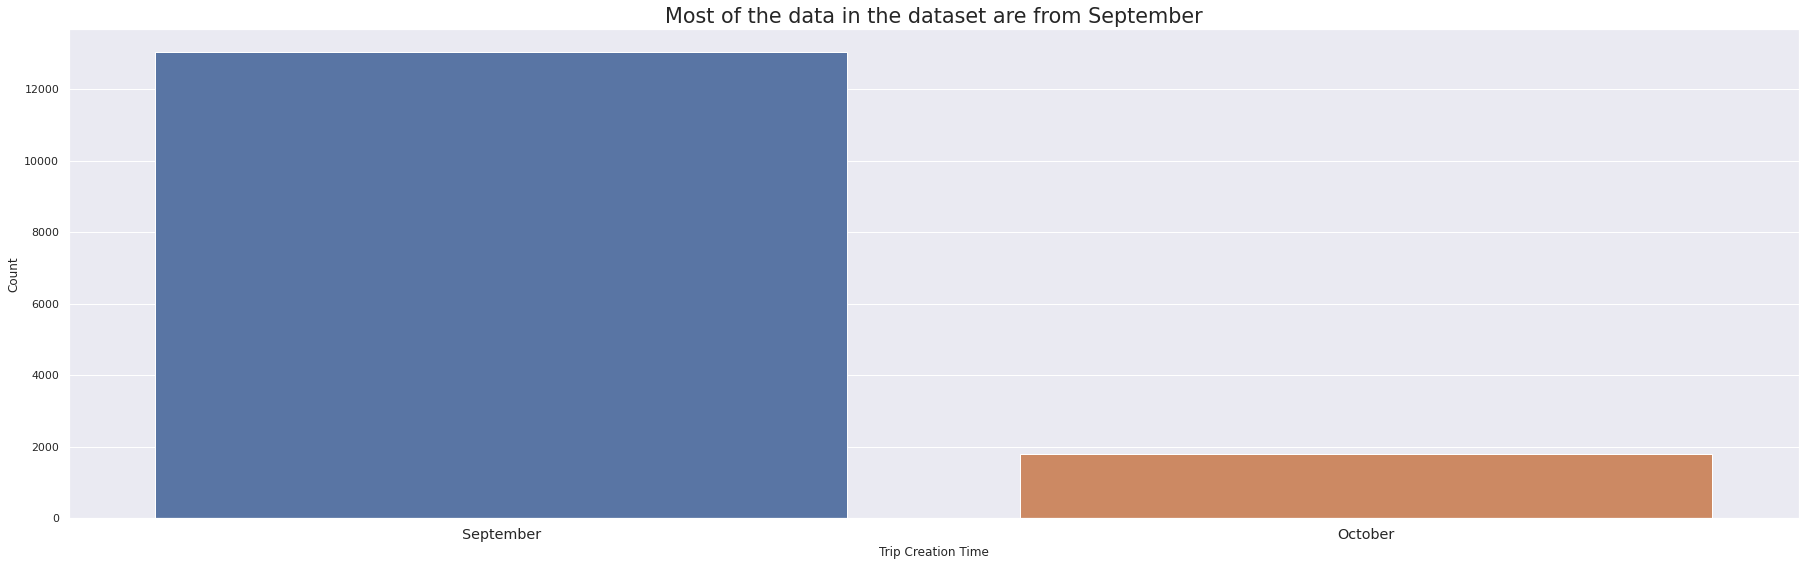

In [ ]:
temp= df.groupby('trip_uuid')['trip_creation_time'].first()
ax= sns.countplot(x= temp.dt.month_name())
ax.set_title(r'Most of the data in the dataset are from September', fontsize= 'xx-large')
ax.set_xlabel('Trip Creation Time')
ax.set_xticklabels(fontsize= 'large', labels= ['September', 'October'])
ax.set_ylabel('Count')
plt.show()

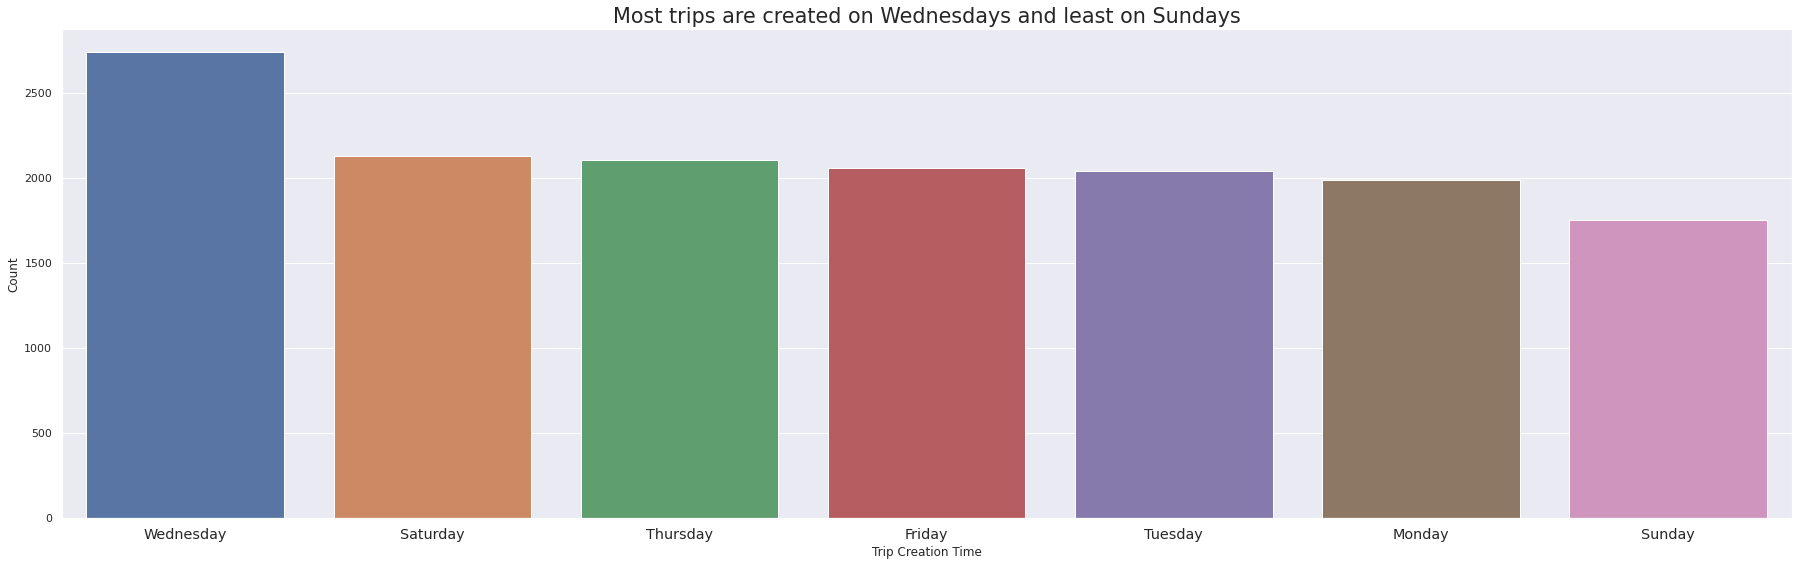

In [ ]:
temp= df.groupby('trip_uuid')['trip_creation_time'].first()
ax= sns.countplot(x= temp.dt.day_name(), order= temp.dt.day_name().value_counts().index)
ax.set_title('Most trips are created on Wednesdays and least on Sundays', fontsize= 'xx-large')
ax.set_xlabel('Trip Creation Time')
ax.set_xticklabels(fontsize= 'large', labels= temp.dt.day_name().value_counts().index)
ax.set_ylabel('Count')
plt.show()

In [ ]:
print(df['route_schedule_uuid'].nunique())
temp= df['route_schedule_uuid'].value_counts(normalize= True)
temp[temp.cumsum() < 0.8].shape

1504


(488,)

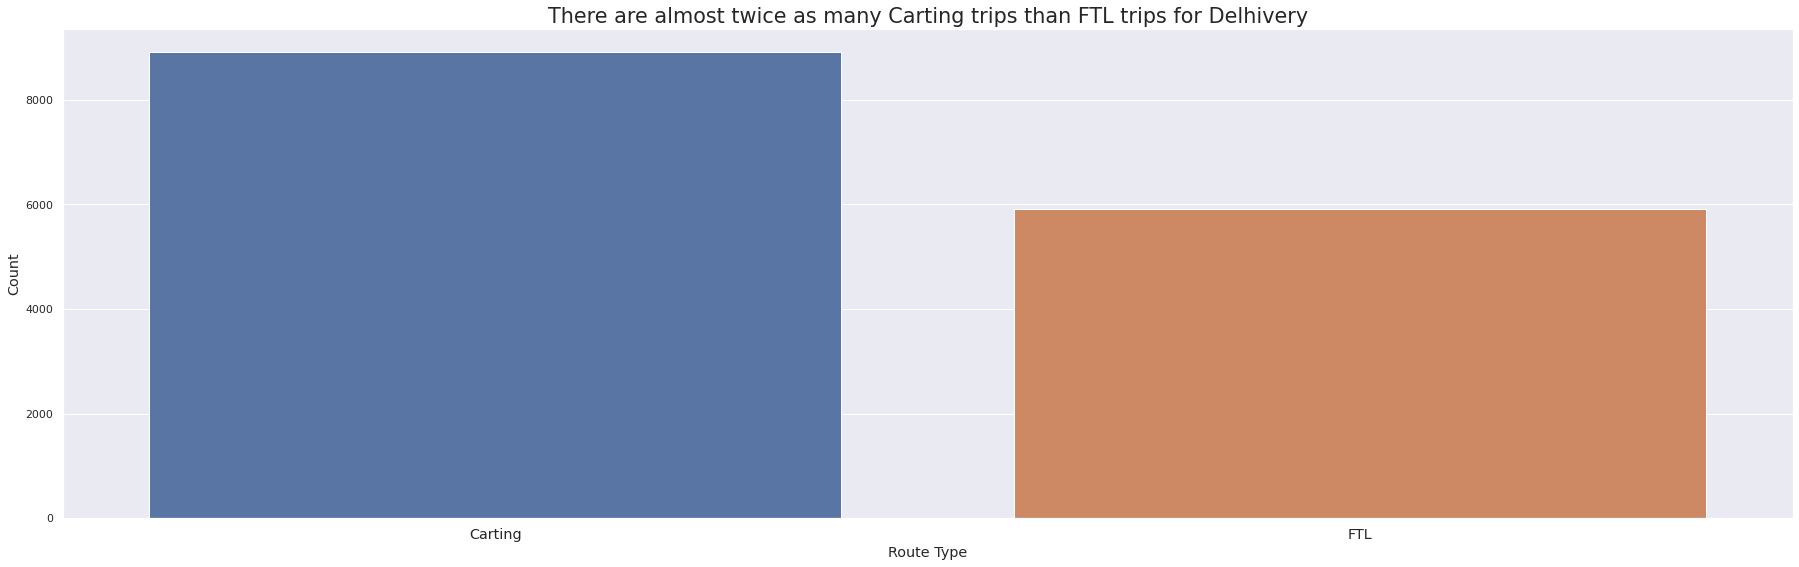

In [ ]:
temp= df.groupby('route_type')['trip_uuid'].nunique().reset_index()
ax= sns.barplot(data= temp, x= 'route_type', y= 'trip_uuid', order= temp['route_type'].unique())
ax.set_title('There are almost twice as many Carting trips than FTL trips for Delhivery', fontsize= 'xx-large')
ax.set_xlabel('Route Type', fontsize= 'large')
ax.set_ylabel('Count', fontsize= 'large')
ax.set_xticklabels(labels= temp['route_type'].unique(), fontsize= 'large')
plt.show()

In [ ]:
print(df['source_center'].nunique())
print(df['source_name'].nunique())
temp= df['source_center'].value_counts(normalize= True)
temp[temp.cumsum() < 0.8].shape[0]

1508
1498


274

In [ ]:
df.loc[df['source_name'].isna(), 'source_center'].nunique()

10

In [ ]:
print(df['destination_center'].nunique())
print(df['destination_name'].nunique())
temp= df['destination_center'].value_counts(normalize= True)
temp[temp.cumsum() < 0.8].shape[0]

1481
1468


257

In [ ]:
df.loc[df['destination_name'].isna(), 'destination_center'].nunique()

13

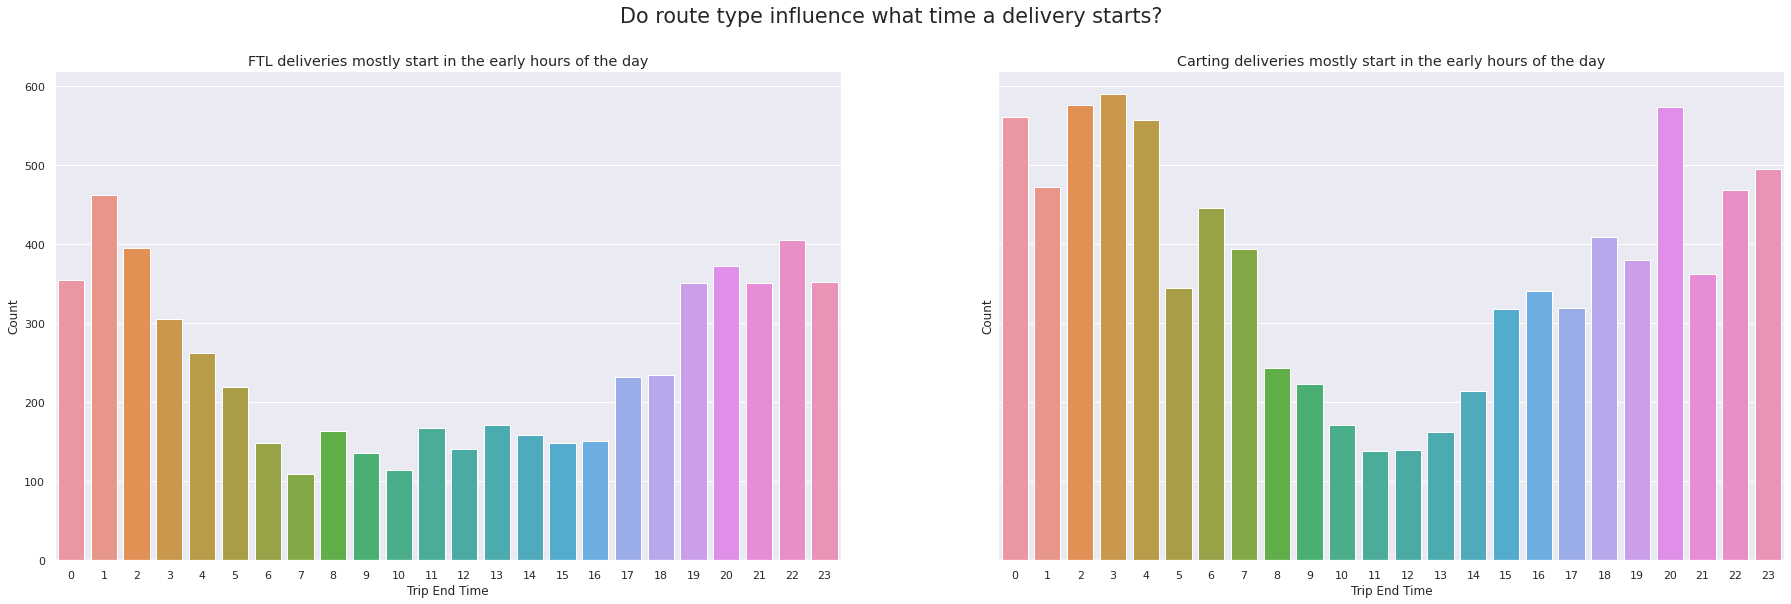

In [ ]:
temp= df.groupby('trip_uuid').first()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey= True)
sns.countplot(x= temp.loc[temp['route_type'] == 'FTL', 'od_start_time'].dt.hour, ax= ax1)
sns.countplot(x= temp.loc[temp['route_type'] == 'Carting', 'od_start_time'].dt.hour, ax= ax2)
plt.suptitle('Do route type influence what time a delivery starts?', fontsize= 'xx-large')
ax1.set_title('FTL deliveries mostly start in the early hours of the day', fontsize= 'large')
ax2.set_title('Carting deliveries mostly start in the early hours of the day', fontsize= 'large')
ax1.set_xlabel('Trip End Time')
ax2.set_xlabel('Trip End Time')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

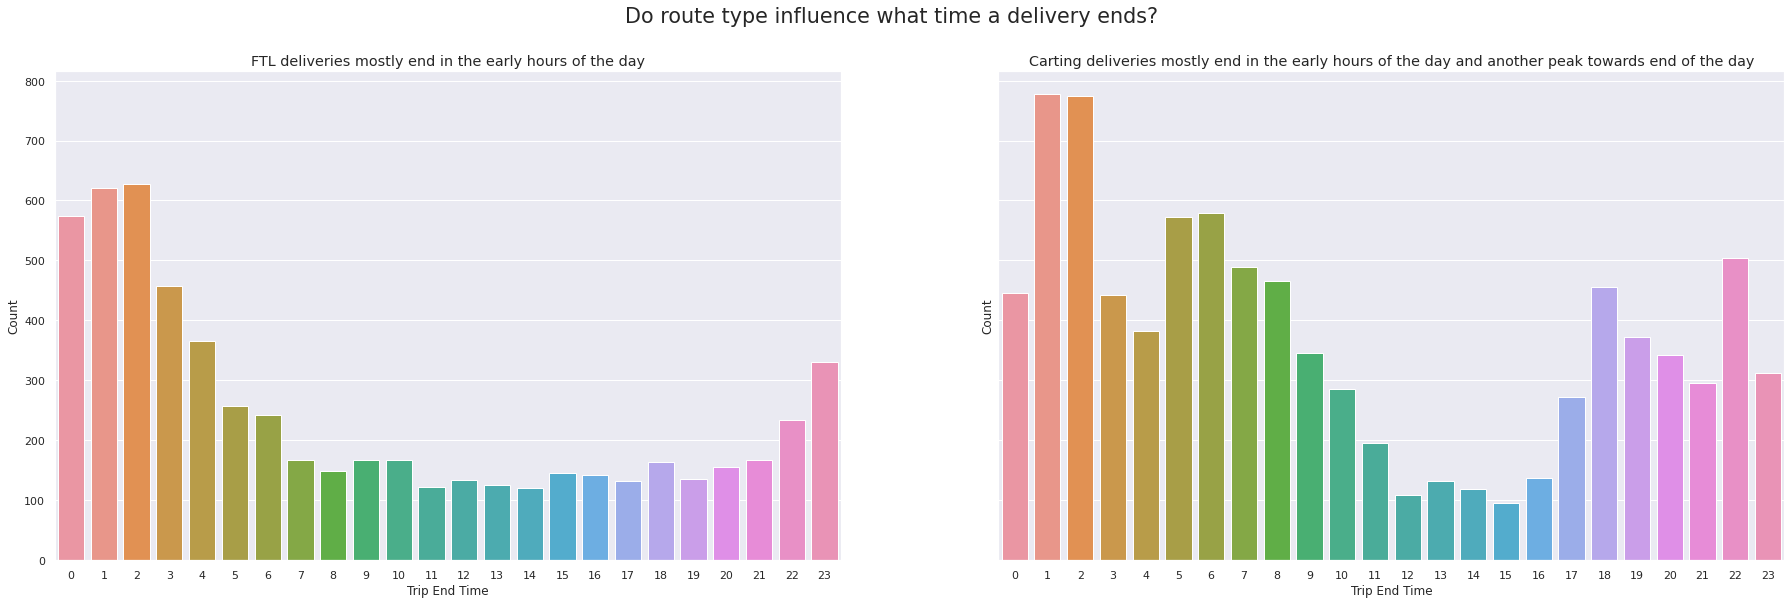

In [ ]:
temp= df.groupby('trip_uuid').first()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey= True)
sns.countplot(x= temp.loc[temp['route_type'] == 'FTL', 'od_end_time'].dt.hour, ax= ax1)
sns.countplot(x= temp.loc[temp['route_type'] == 'Carting', 'od_end_time'].dt.hour, ax= ax2)
plt.suptitle('Do route type influence what time a delivery ends?', fontsize= 'xx-large')
ax1.set_title('FTL deliveries mostly end in the early hours of the day', fontsize= 'large')
ax2.set_title('Carting deliveries mostly end in the early hours of the day and another peak towards end of the day', fontsize= 'large')
ax1.set_xlabel('Trip End Time')
ax2.set_xlabel('Trip End Time')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

In [ ]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

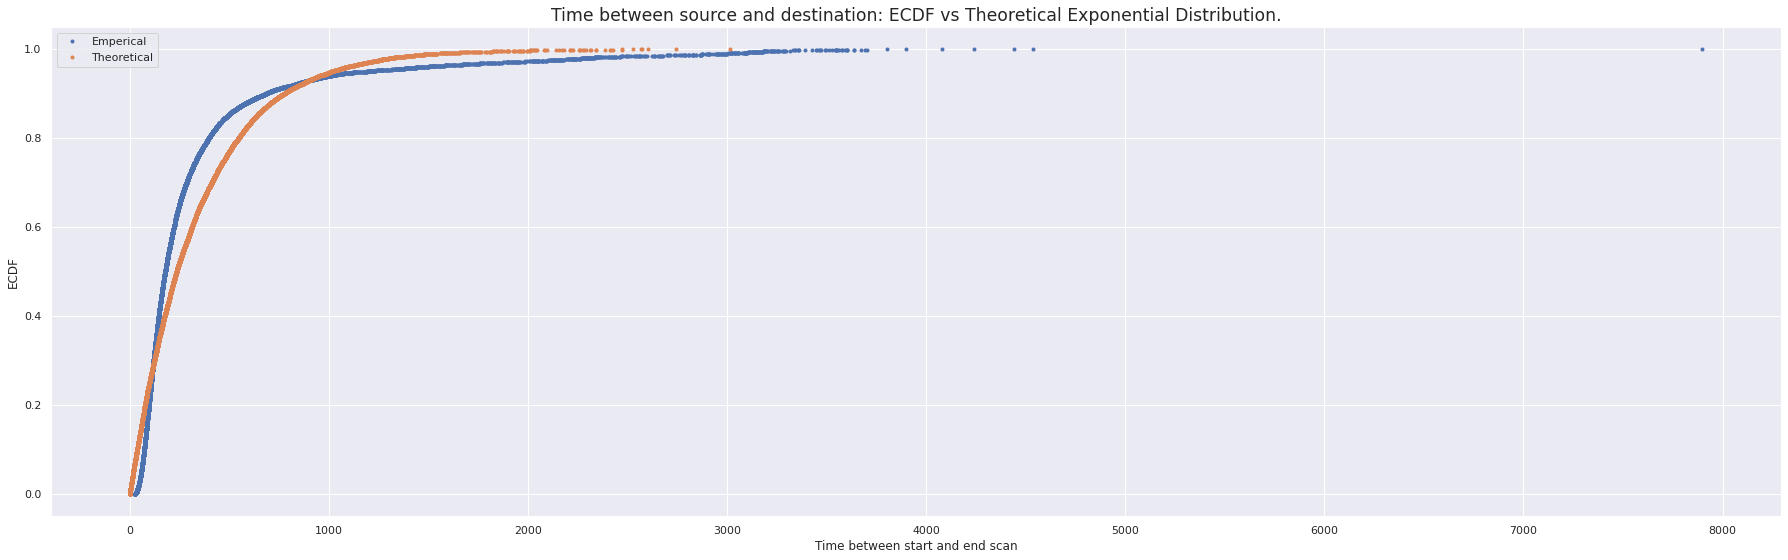

In [ ]:
temp = df.groupby('trip_uuid').first()['start_scan_to_end_scan']
temp_x, temp_y= ecdf(temp)
theo_x, theo_y= ecdf(np.random.exponential(temp.mean(), len(temp_x)))

plt.plot(temp_x, temp_y, marker= '.', linestyle= 'none')
plt.plot(theo_x, theo_y, marker= '.', linestyle= 'none')
plt.xlabel('Time between start and end scan')
plt.ylabel('ECDF')
plt.title('Time between source and destination: ECDF vs Theoretical Exponential Distribution.', fontsize= 'x-large')
plt.legend(['Emperical', 'Theoretical'])
plt.show()

In [ ]:
np.random.poisson?

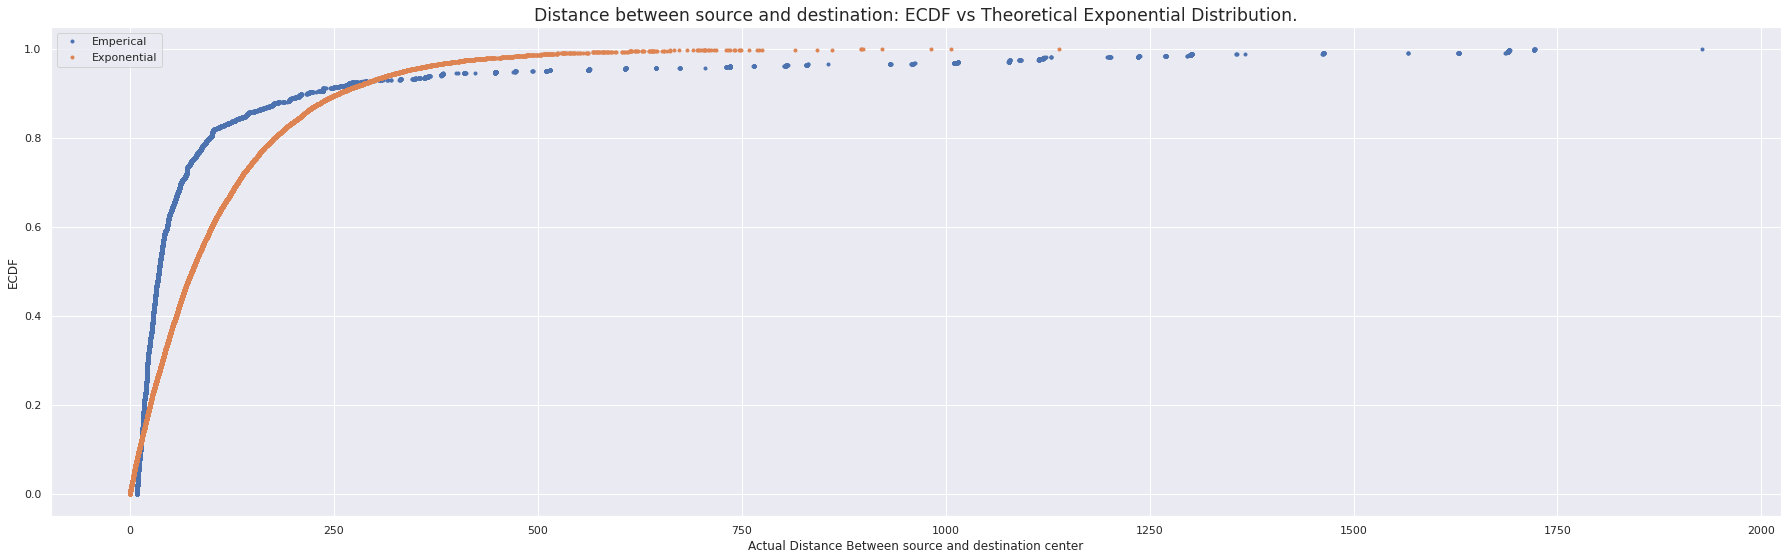

In [ ]:
temp= df.groupby('trip_uuid')['actual_distance_to_destination'].last()
emp_x, emp_y= ecdf(temp)
exp_x, exp_y= ecdf(np.random.exponential(temp.mean(), len(emp_x)))

plt.xlabel('Actual Distance Between source and destination center')
plt.ylabel('ECDF')
plt.plot(emp_x, emp_y, marker= '.', linestyle = 'none', label= 'Emperical')
plt.plot(exp_x, exp_y, marker= '.', linestyle = 'none', label= 'Exponential')
plt.title('Distance between source and destination: ECDF vs Theoretical Exponential Distribution.', fontsize= 'x-large')
plt.legend()
plt.show()

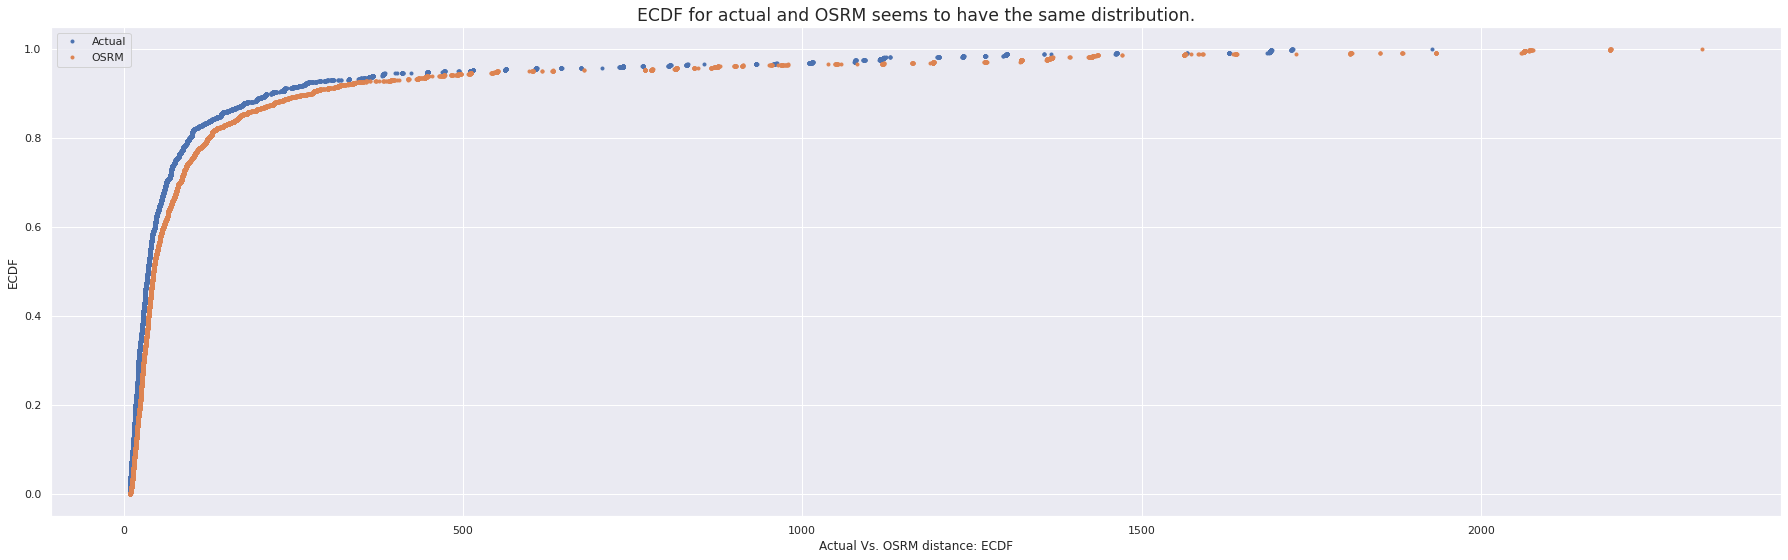

In [ ]:
actual= df.groupby('trip_uuid')['actual_distance_to_destination'].last()
osrm= df.groupby('trip_uuid')['osrm_distance'].last()
actual_x, actual_y= ecdf(actual)
osrm_x, osrm_y= ecdf(osrm)

plt.xlabel('Actual Vs. OSRM distance: ECDF')
plt.ylabel('ECDF')
plt.plot(actual_x, actual_y, marker= '.', linestyle = 'none', label= 'Actual')
plt.plot(osrm_x, osrm_y, marker= '.', linestyle = 'none', label= 'OSRM')
plt.title('ECDF for actual and OSRM seems to have the same distribution.', fontsize= 'x-large')
plt.legend()
plt.show()

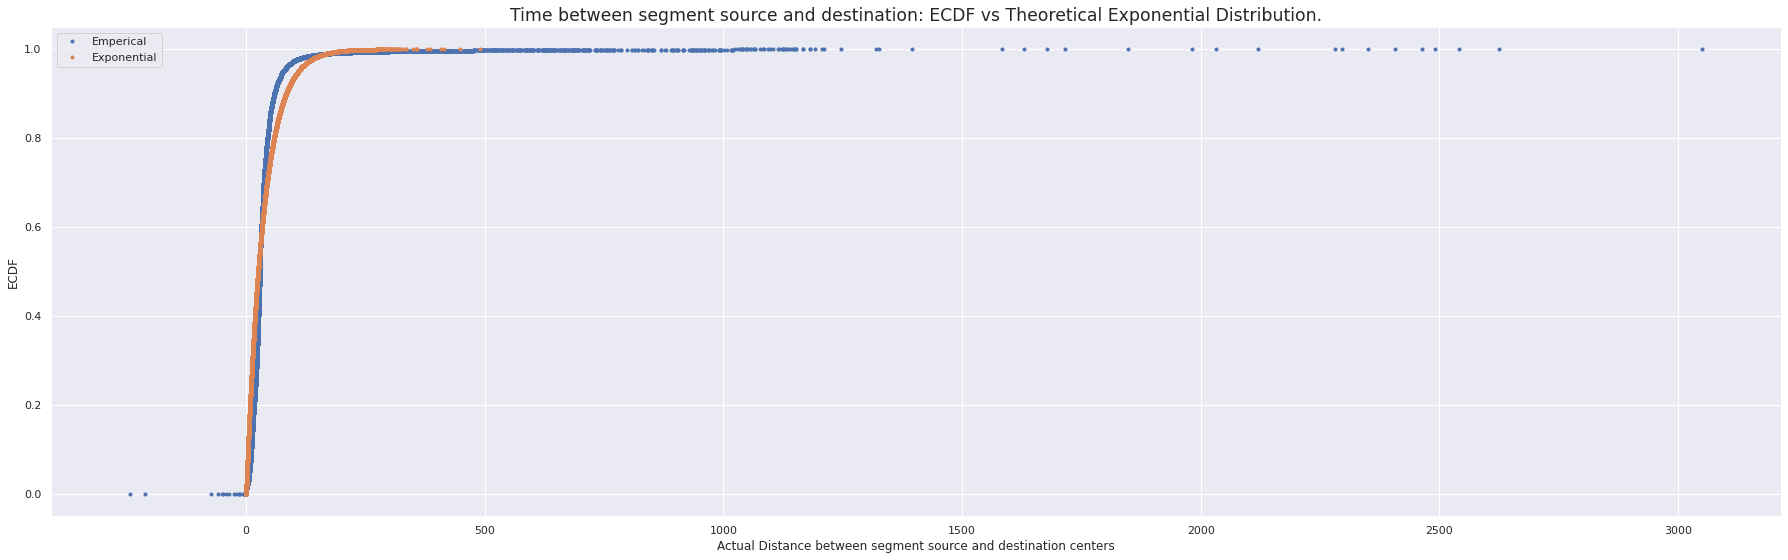

In [ ]:
temp= df['segment_actual_time']
emp_x, emp_y= ecdf(temp)
exp_x, exp_y= ecdf(np.random.exponential(temp.mean(), len(emp_x)))

plt.xlabel('Actual Distance between segment source and destination centers')
plt.ylabel('ECDF')
plt.plot(emp_x, emp_y, marker= '.', linestyle = 'none', label= 'Emperical')
plt.plot(exp_x, exp_y, marker= '.', linestyle = 'none', label= 'Exponential')
plt.title('Time between segment source and destination: ECDF vs Theoretical Exponential Distribution.', fontsize= 'x-large')
plt.legend()
plt.show()

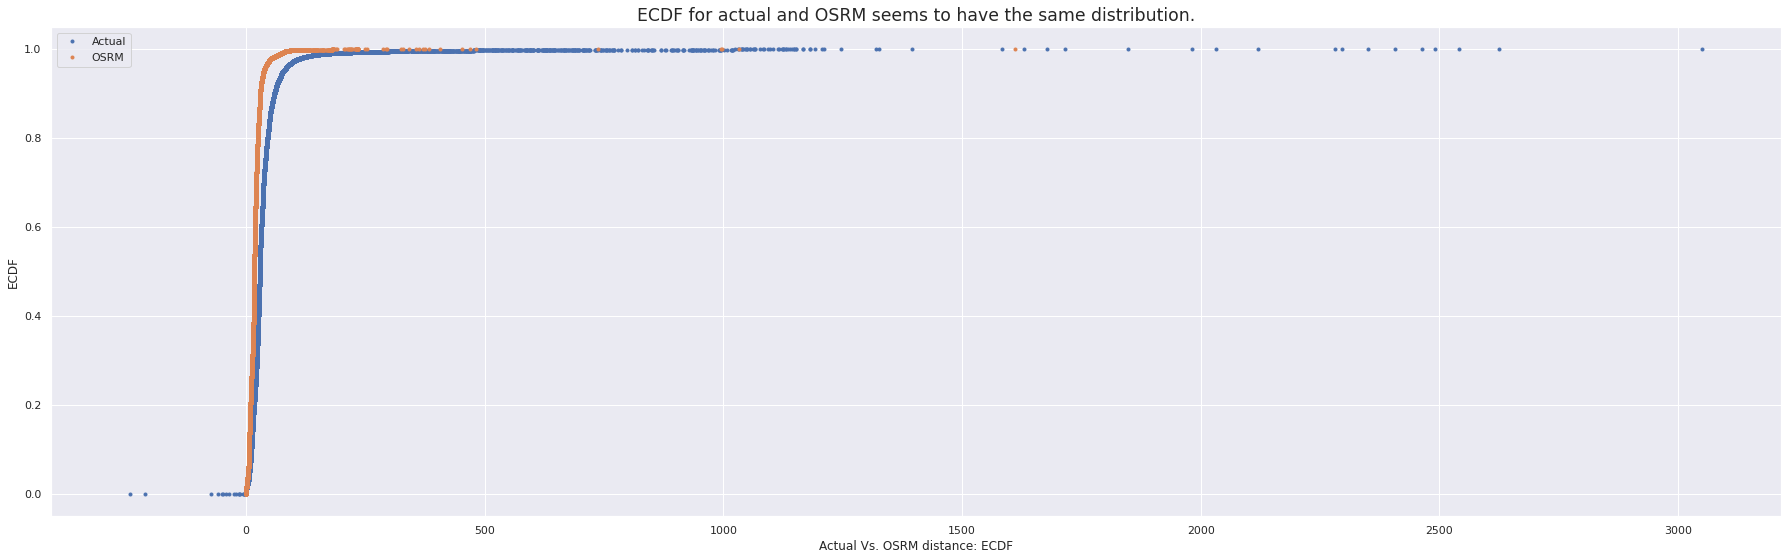

In [ ]:
actual= df['segment_actual_time']
osrm= df['segment_osrm_time']
actual_x, actual_y= ecdf(actual)
osrm_x, osrm_y= ecdf(osrm)

plt.xlabel('Actual Vs. OSRM distance: ECDF')
plt.ylabel('ECDF')
plt.plot(actual_x, actual_y, marker= '.', linestyle = 'none', label= 'Actual')
plt.plot(osrm_x, osrm_y, marker= '.', linestyle = 'none', label= 'OSRM')
plt.title('ECDF for actual and OSRM seems to have the same distribution.', fontsize= 'x-large')
plt.legend()
plt.show()

# Merging the rows to make the dataset easier to work with.
* We will merge by the trip_uuid, source_center and destination_center. This seems like the unique identifier for this dataset.
* We will get the first or the last value for most fields depending on their nature like start time or end time.
* We will capture sum of fields like segment actual and osrm time

In [ ]:
group= ['trip_uuid', 'source_center', 'destination_center']

In [ ]:
aggregations = {
    'data': 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'od_start_time': 'min',
    'od_end_time': 'max',
    'start_scan_to_end_scan': 'last',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}

In [ ]:
cleaned= df.groupby(group, as_index= False).agg(aggregations)

In [ ]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26368 non-null  object        
 1   data                            26368 non-null  category      
 2   trip_creation_time              26368 non-null  datetime64[ns]
 3   route_schedule_uuid             26368 non-null  object        
 4   route_type                      26368 non-null  category      
 5   source_center                   26368 non-null  object        
 6   source_name                     26302 non-null  object        
 7   destination_center              26368 non-null  object        
 8   destination_name                26287 non-null  object        
 9   od_start_time                   26368 non-null  datetime64[ns]
 10  od_end_time                     26368 non-null  datetime64[ns]
 11  st

# Feature Engineering
* Used regex to extract the first part from destination and source name and state. Used split to extract city and place from first part and added columns city, place and state for both source and destination name
* Year, month, day and hour of trip creation was extracted and added to the cleaned data set.
* Calculating time between end and start od time in minutes gives us the same result as start_scan_to_end_scan.

In [ ]:
cleaned[['part1', 'destination_state']]= cleaned['destination_name'].str.extract(r'(.*_.*_.*)\s\((.*)\)')
cleaned[['destination_city', 'destination_place'] ] = cleaned['part1'].str.split('_', expand= True).loc[:, [0, 1]]
cleaned.drop(['part1', 'destination_name'], axis= 1, inplace= True)

cleaned[['part1', 'source_state']]= cleaned['source_name'].str.extract(r'(.*_.*_.*)\s\((.*)\)')
cleaned[['source_city', 'source_place'] ] = cleaned['part1'].str.split('_', expand= True).loc[:, [0, 1]]
cleaned.drop(['part1', 'source_name'], axis= 1, inplace= True)

cleaned['trip_creation_year'] = cleaned['trip_creation_time'].dt.year
cleaned['trip_creation_month'] = cleaned['trip_creation_time'].dt.month
cleaned['trip_creation_day'] = cleaned['trip_creation_time'].dt.day
cleaned['trip_creation_hour'] = cleaned['trip_creation_time'].dt.hour

cleaned['time_between_start_and_end_in_mins']= ((cleaned['od_end_time'] - cleaned['od_start_time']) / np.timedelta64(1, 'm'))

cleaned.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_city,destination_place,source_state,source_city,source_place,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,time_between_start_and_end_in_mins
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,IND000000ACB,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,Gurgaon,Bilaspur,Uttar Pradesh,Kanpur,Central,2018,9,12,0,1260.604421
1,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,Kanpur,Central,Madhya Pradesh,Bhopal,Trnsport,2018,9,12,0,999.505379
2,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,Chikblapur,ShntiSgr,Karnataka,Doddablpur,ChikaDPP,2018,9,12,0,58.832388
3,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,Doddablpur,ChikaDPP,Karnataka,Tumkur,Veersagr,2018,9,12,0,122.779486
4,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,IND160002AAC,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,Chandigarh,Mehmdpur,Haryana,Gurgaon,Bilaspur,2018,9,12,0,834.638929


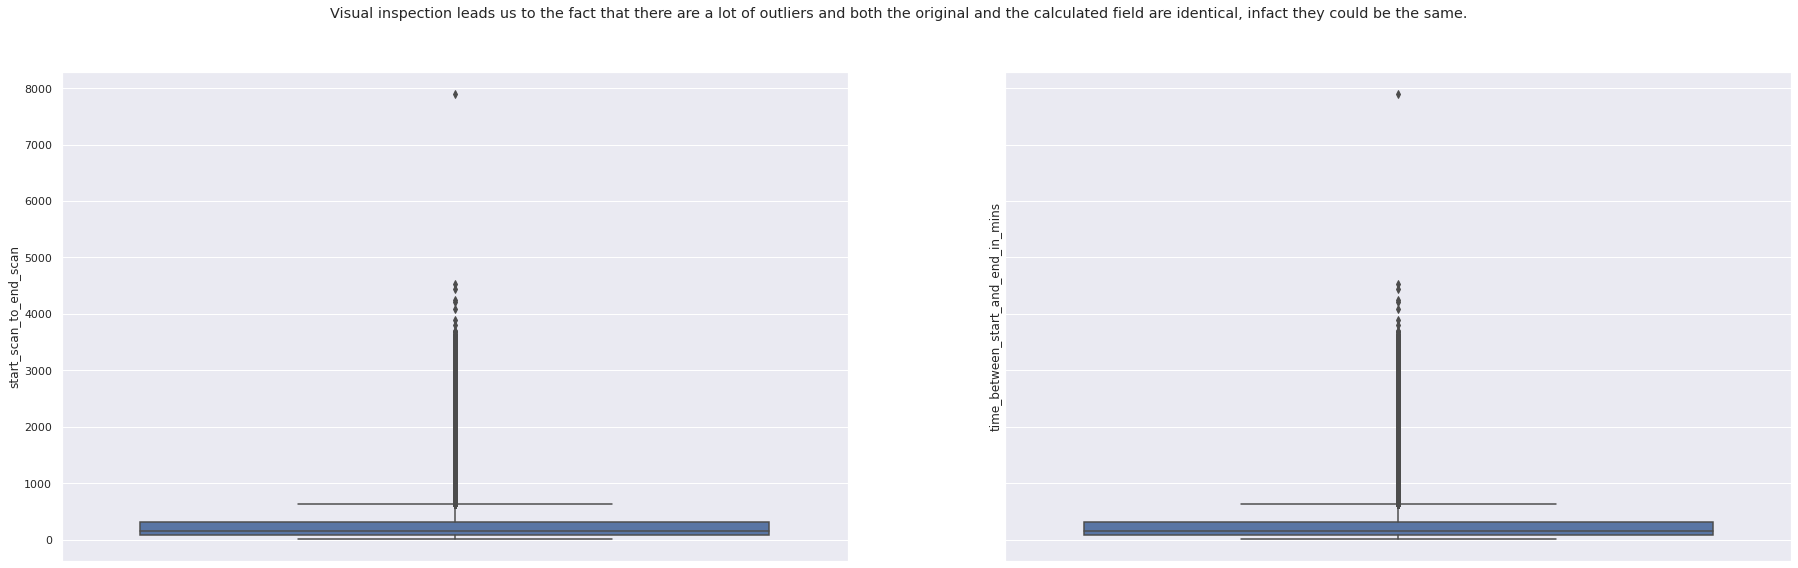

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned['start_scan_to_end_scan'], ax= ax1)
sns.boxplot(y= cleaned['time_between_start_and_end_in_mins'], ax= ax2)
plt.suptitle('Visual inspection leads us to the fact that there are a lot of outliers and both the original and the calculated field are identical, infact they could be the same.')

plt.show()

# Treating outliers

In [ ]:
q1= cleaned['start_scan_to_end_scan'].quantile(.25)
q3= cleaned['start_scan_to_end_scan'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

cleaned['start_scan_to_end_scan_treated']= cleaned['start_scan_to_end_scan'].clip(lower, upper)

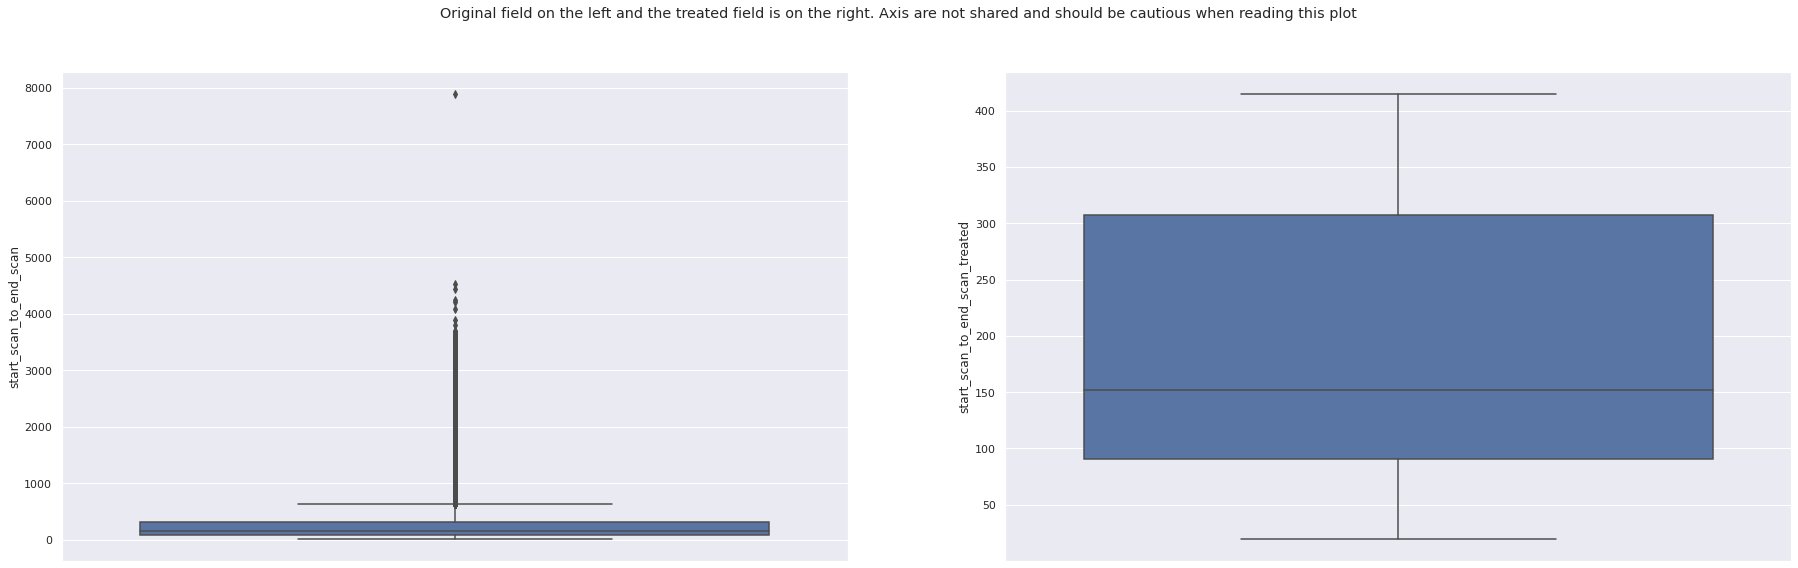

In [ ]:

fig, (ax1, ax2)= plt.subplots(1, 2, sharey= False)
sns.boxplot(y= cleaned['start_scan_to_end_scan'], ax= ax1)
sns.boxplot(y= cleaned['start_scan_to_end_scan_treated'], ax= ax2)
plt.suptitle('Original field on the left and the treated field is on the right. Axis are not shared and should be cautious when reading this plot')

plt.show()

# Hypothesis testing.

### Hypothesis testing / visual analysis between actual time aggregated value and OSRM aggregated value.

As the pvalue is less than 0.05 we reject the null hypothesis that actual time is equal to OSRM time. We can see this visually as well.


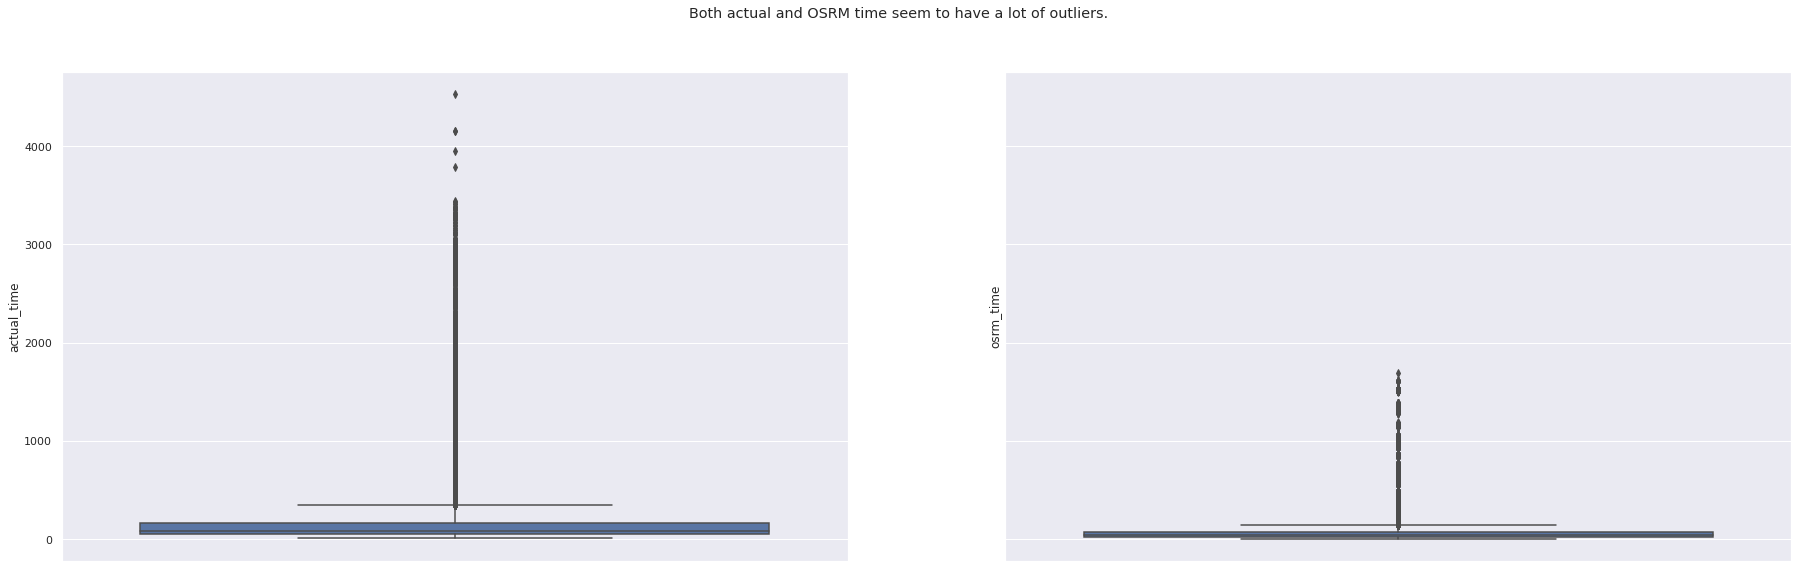

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned['actual_time'], ax= ax1)
sns.boxplot(y= cleaned['osrm_time'], ax= ax2)
plt.suptitle('Both actual and OSRM time seem to have a lot of outliers.')

plt.show()

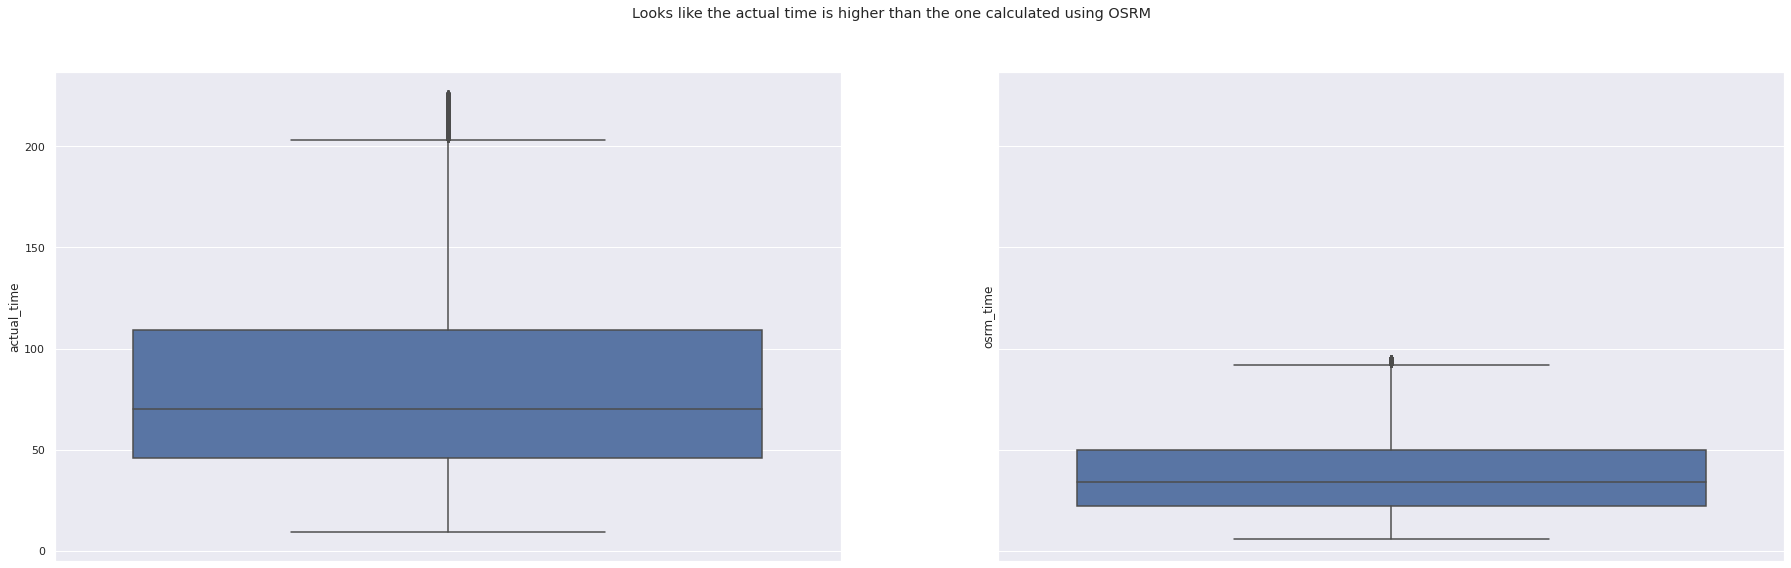

In [ ]:
# Treating outliers in actual time.
q1= cleaned['actual_time'].quantile(.25)
q3= cleaned['actual_time'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

actual_idx= (cleaned['actual_time'] > lower) & (cleaned['actual_time'] < upper)

# Treating outliers in OSRM time.
q1= cleaned['osrm_time'].quantile(.25)
q3= cleaned['osrm_time'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

osrm_idx= (cleaned['osrm_time'] < upper)

# Plotting the treated fields.

fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned.loc[actual_idx, 'actual_time'], ax= ax1)
sns.boxplot(y= cleaned.loc[osrm_idx, 'osrm_time'], ax= ax2)
plt.suptitle('Looks like the actual time is higher than the one calculated using OSRM')

plt.show()

## Based on the visual analysis alone we can figure out that OSRM time is lower than the actual time.

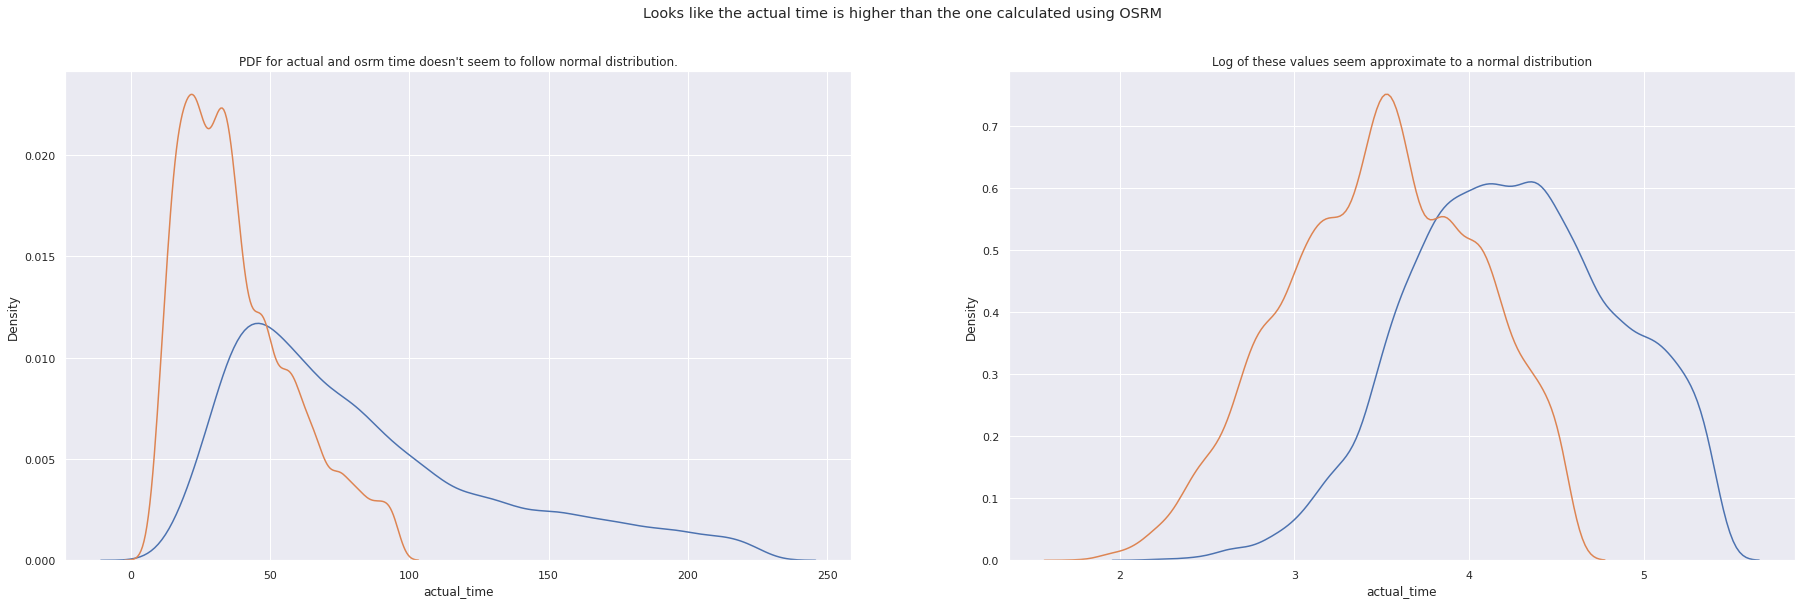

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= False)
sns.kdeplot(x= cleaned.loc[actual_idx, 'actual_time'], ax= ax1)
sns.kdeplot(x= cleaned.loc[osrm_idx, 'osrm_time'], ax= ax1)
ax1.set_title('PDF for actual and osrm time doesn\'t seem to follow normal distribution.')

sns.kdeplot(x= np.log(cleaned.loc[actual_idx, 'actual_time']), ax= ax2)
sns.kdeplot(x= np.log(cleaned.loc[osrm_idx, 'osrm_time']), ax= ax2)
ax2.set_title('Log of these values seem approximate to a normal distribution')

plt.suptitle('Looks like the actual time is higher than the one calculated using OSRM')

plt.show()

In [ ]:
print('average actual time:', cleaned.loc[actual_idx, 'actual_time'].mean())
print('standard deviation:', cleaned.loc[actual_idx, 'actual_time'].std())
print('average osrm time:', cleaned.loc[osrm_idx, 'osrm_time'].mean())
print('standard deviation:', cleaned.loc[osrm_idx, 'osrm_time'].std())

average actual time: 83.58569513153637
standard deviation: 48.70340878883891
average osrm time: 38.14671546372649
standard deviation: 20.232805741507132


In [ ]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [ ]:
# Null hypothesis: actual time and osrm time are actually the same.
# Alternate hypothesis: OSRM time is actually lower than actual time.

# test-statistic = average time

# one-tailed T-test to check if osrm is lower than actual time.

stat, pvalue= ttest_ind(cleaned['actual_time'], cleaned['osrm_time'], equal_var= False, alternative= 'greater')

print(stat)
print(pvalue)

if pvalue < 0.05:
  print('we reject the null hypothesis.')
else:
  print('we fail to reject the null hypothesis.')

41.82845508363711
0.0
we reject the null hypothesis.


### Hypothesis testing / visual analysis between actual time aggregated value and segment actual time aggregated value.
* Visual analysis reveals that both actual time and segmented actual time are similar (possibly the same).
* We reject the null hypothesis that actual time and segment actual time are the same.


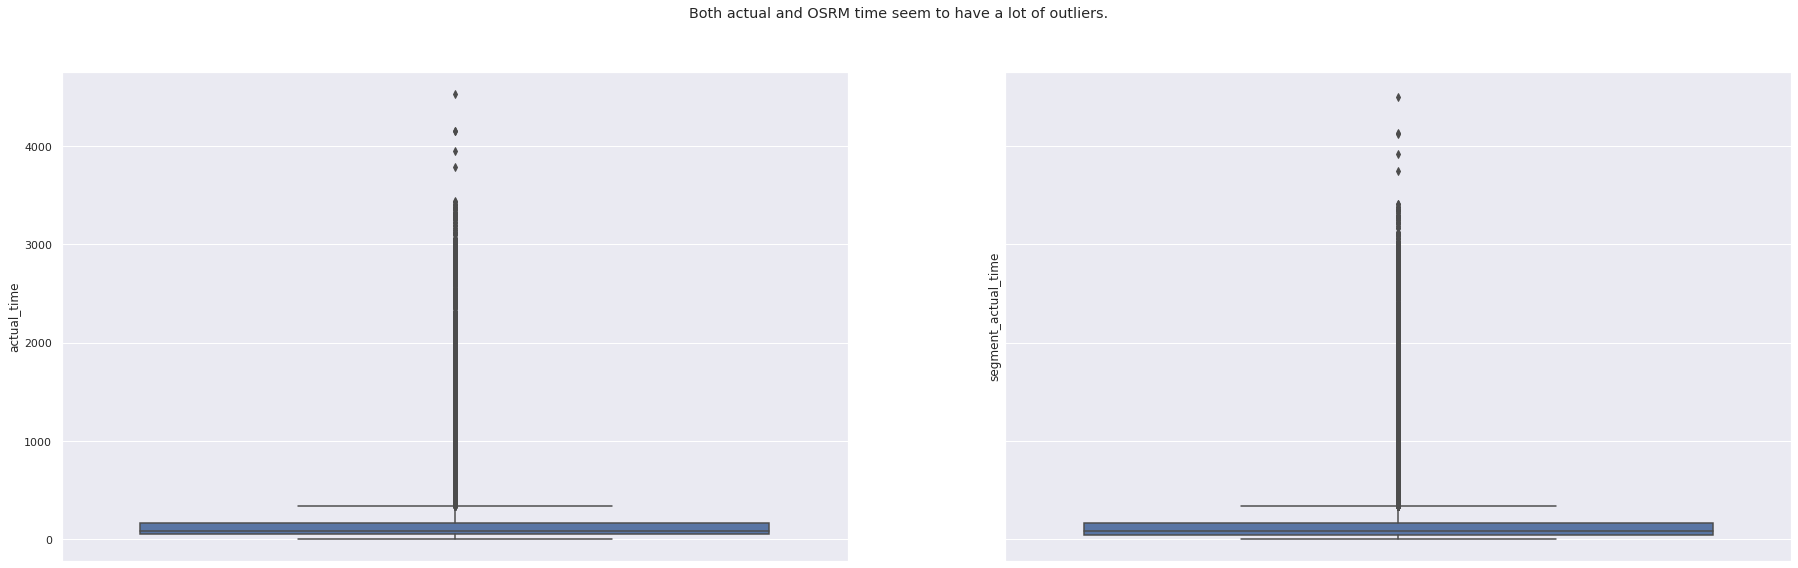

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned['actual_time'], ax= ax1)
sns.boxplot(y= cleaned['segment_actual_time'], ax= ax2)
plt.suptitle('Both actual and OSRM time seem to have a lot of outliers.')

plt.show()

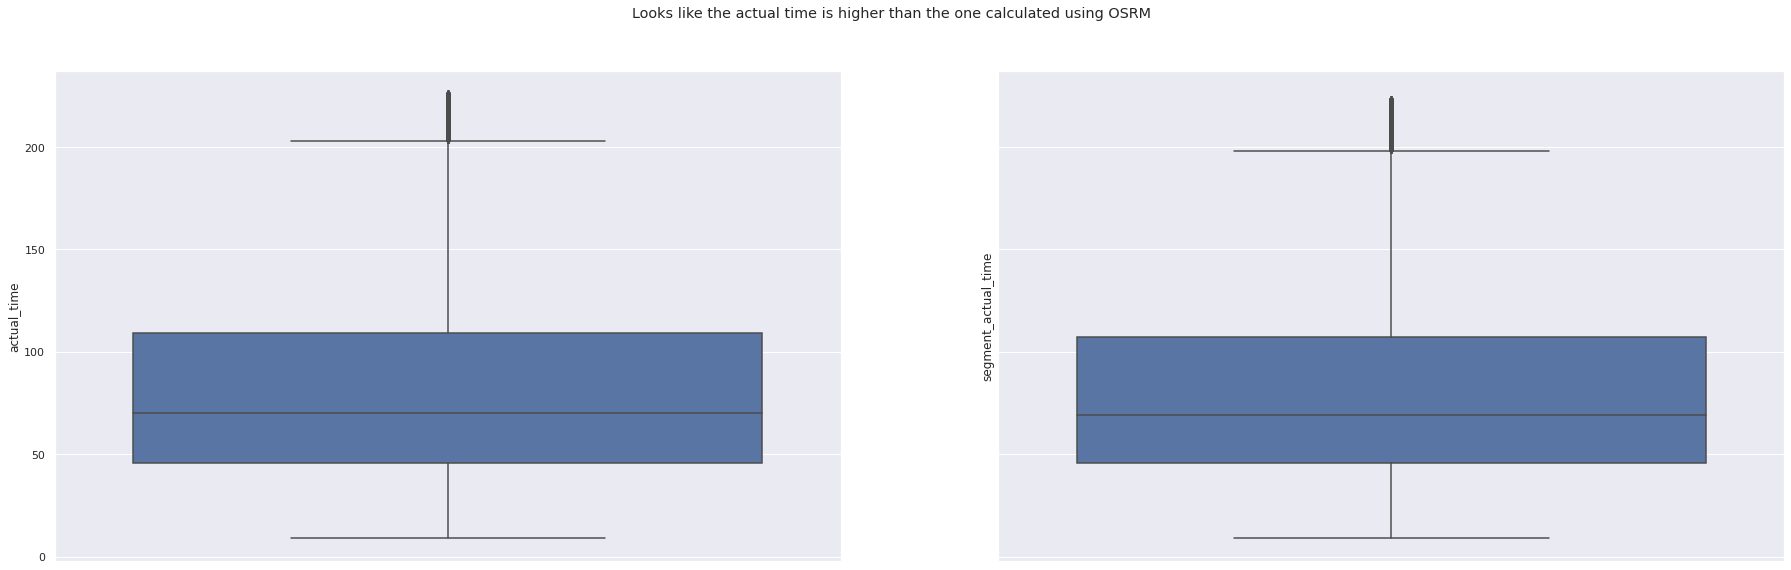

In [ ]:
# Treating outliers in actual time.
q1= cleaned['actual_time'].quantile(.25)
q3= cleaned['actual_time'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

actual_idx= (cleaned['actual_time'] > lower) & (cleaned['actual_time'] < upper)

# Treating outliers in OSRM time.
q1= cleaned['segment_actual_time'].quantile(.25)
q3= cleaned['segment_actual_time'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

segment_actual_idx= (cleaned['segment_actual_time'] < upper)

# Plotting the treated fields.

fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned.loc[actual_idx, 'actual_time'], ax= ax1)
sns.boxplot(y= cleaned.loc[segment_actual_idx, 'segment_actual_time'], ax= ax2)
plt.suptitle('Looks like the actual time is higher than the one calculated using OSRM')

plt.show()

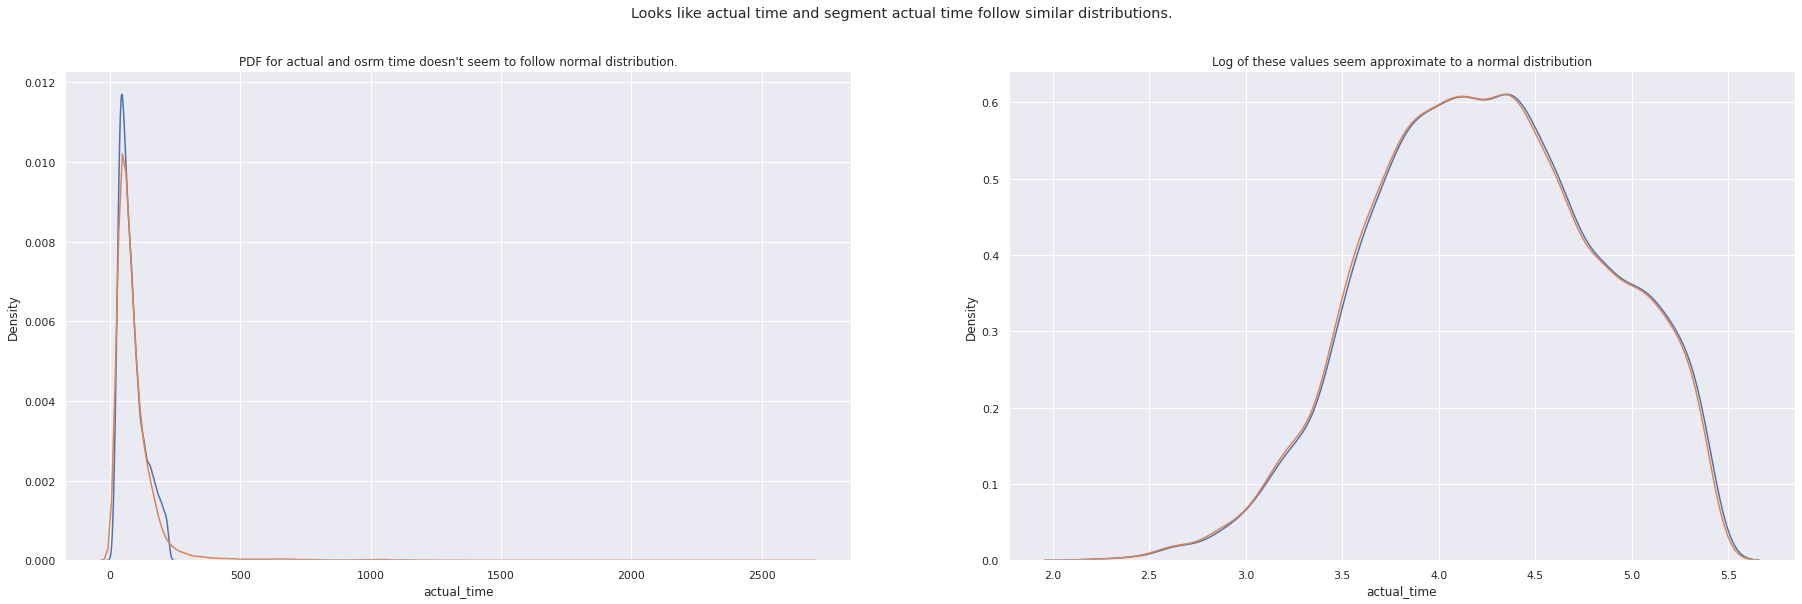

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= False)
sns.kdeplot(x= cleaned.loc[actual_idx, 'actual_time'], ax= ax1)
sns.kdeplot(x= cleaned.loc[osrm_idx, 'segment_actual_time'], ax= ax1)
ax1.set_title('PDF for actual and osrm time doesn\'t seem to follow normal distribution.')

sns.kdeplot(x= np.log(cleaned.loc[actual_idx, 'actual_time']), ax= ax2)
sns.kdeplot(x= np.log(cleaned.loc[segment_actual_idx, 'segment_actual_time']), ax= ax2)
ax2.set_title('Log of these values seem approximate to a normal distribution')

plt.suptitle('Looks like actual time and segment actual time follow similar distributions.')

plt.show()

In [ ]:
print('average actual time:', cleaned.loc[actual_idx, 'actual_time'].mean())
print('standard deviation:', cleaned.loc[actual_idx, 'actual_time'].std())
print('average osrm time:', cleaned.loc[segment_actual_idx, 'segment_actual_time'].mean())
print('standard deviation:', cleaned.loc[segment_actual_idx, 'segment_actual_time'].std())

average actual time: 83.58569513153637
standard deviation: 48.70340878883891
average osrm time: 82.61417067752684
standard deviation: 48.135119144442605


In [ ]:
actual_sample_size= cleaned.loc[actual_idx, 'actual_time'].shape[0]
segment_actual_sample_size= cleaned.loc[segment_actual_idx, 'segment_actual_time'].shape[0]
print(actual_sample_size, segment_actual_sample_size)

21629 21608


In [ ]:
# Null hypothesis: actual time and segment actual time are actually the same.
# Alternate hypothesis: actual time and segment actual time are different.

# test-statistic = average time

# H0: avg. actual time = avg. segment actual time
# H1: avg. actual time != avg. segment actual time

# two-tailed T-test to check if actual and segment actual time are actually different.

stat, pvalue= ttest_ind(cleaned.loc[actual_idx, 'actual_time'].sample(segment_actual_sample_size), cleaned.loc[segment_actual_idx, 'segment_actual_time'], equal_var= True)

print(stat)
print(pvalue)

if pvalue < 0.05:
  print('we reject the null hypothesis.')
else:
  print('we fail to reject the null hypothesis.')

2.061599747041053
0.03925182470378313
we reject the null hypothesis.


### Hypothesis testing / visual analysis between osrm distance aggregated value and segment osrm distance aggregated value
* Alhtough visually they look similar we reject the null hypothesis that the osrm_distance and segement_osrm_distance is the same.

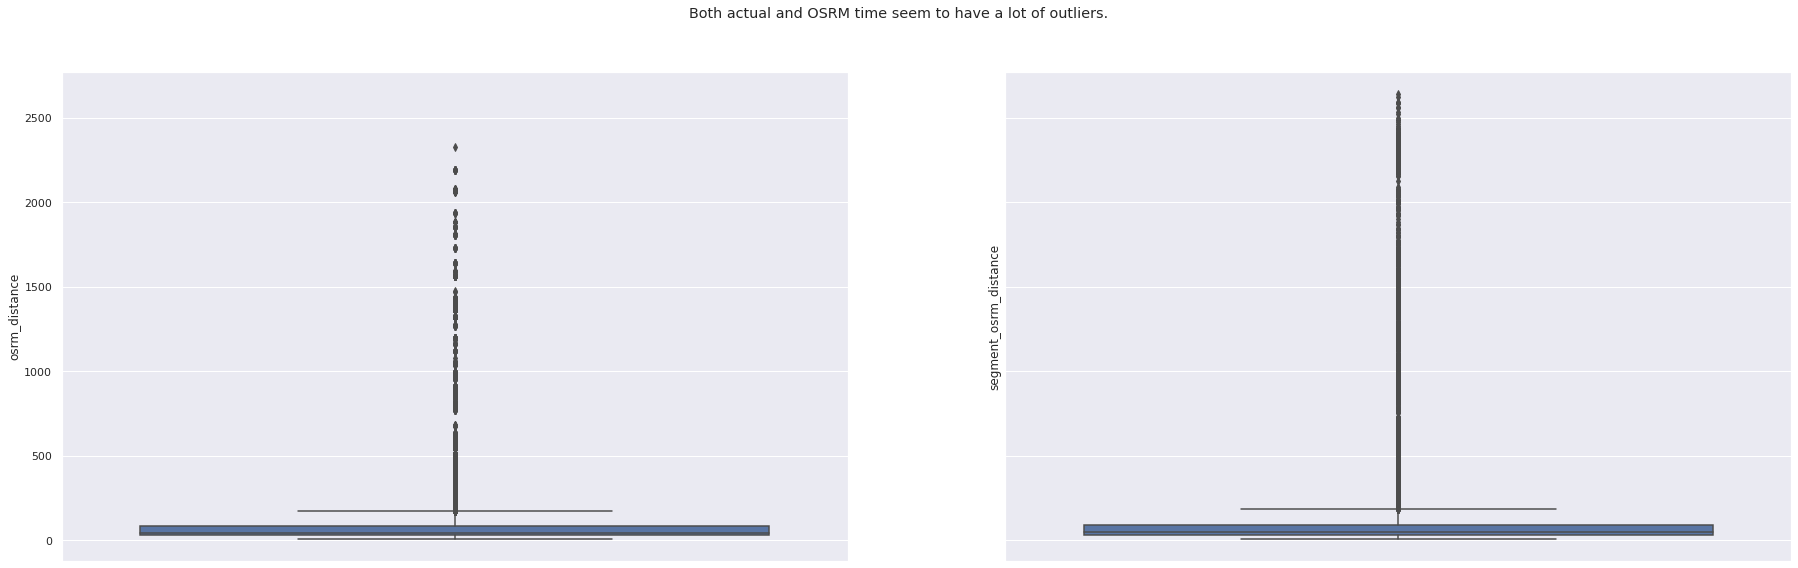

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned['osrm_distance'], ax= ax1)
sns.boxplot(y= cleaned['segment_osrm_distance'], ax= ax2)
plt.suptitle('Both actual and OSRM time seem to have a lot of outliers.')

plt.show()

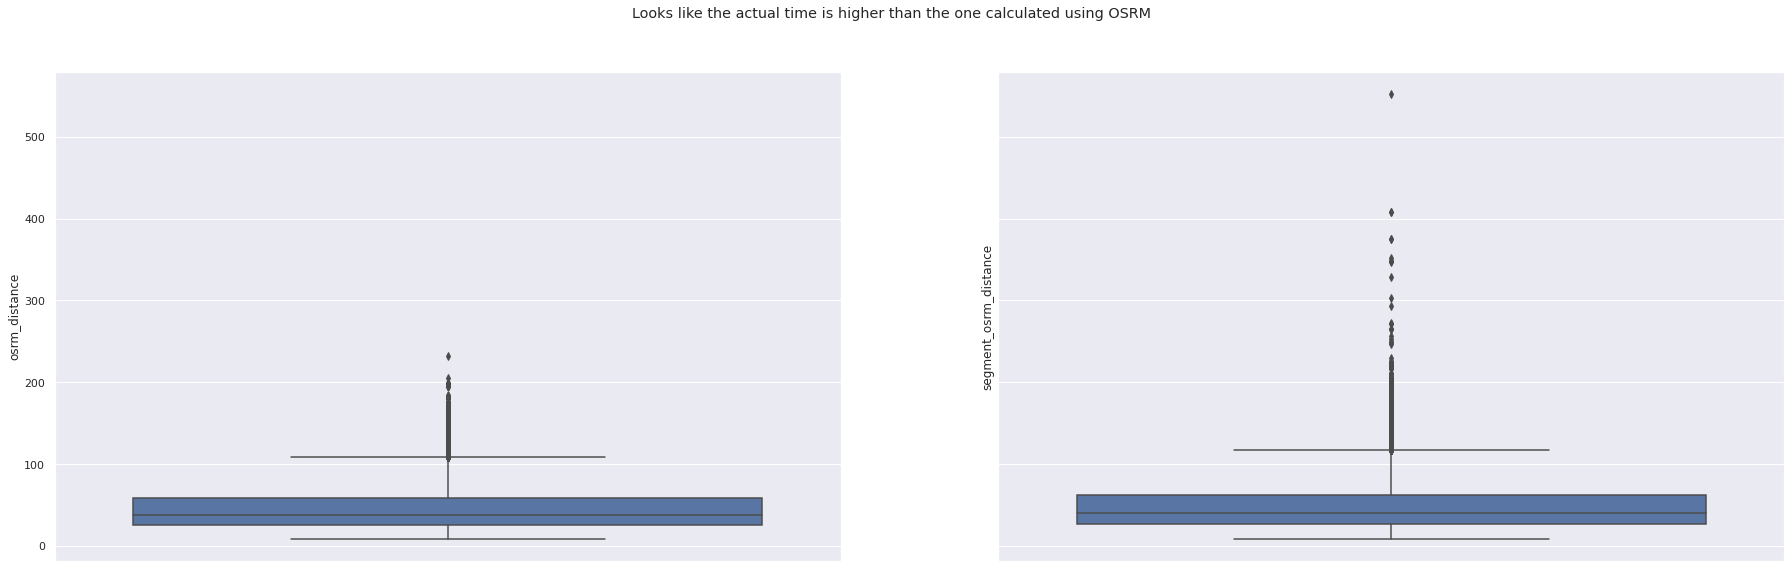

In [ ]:
# Treating outliers in actual time.
q1= cleaned['osrm_distance'].quantile(.25)
q3= cleaned['osrm_distance'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

osrm_idx= (cleaned['osrm_distance'] > lower) & (cleaned['osrm_distance'] < upper)

# Treating outliers in OSRM time.
q1= cleaned['segment_osrm_distance'].quantile(.25)
q3= cleaned['segment_osrm_distance'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

segment_osrm_idx= (cleaned['segment_osrm_distance'] > lower) & (cleaned['segment_osrm_distance'] < upper)

# Plotting the treated fields.

fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned.loc[osrm_idx, 'osrm_distance'], ax= ax1)
sns.boxplot(y= cleaned.loc[segment_osrm_idx, 'segment_osrm_distance'], ax= ax2)
plt.suptitle('Looks like the actual time is higher than the one calculated using OSRM')

plt.show()

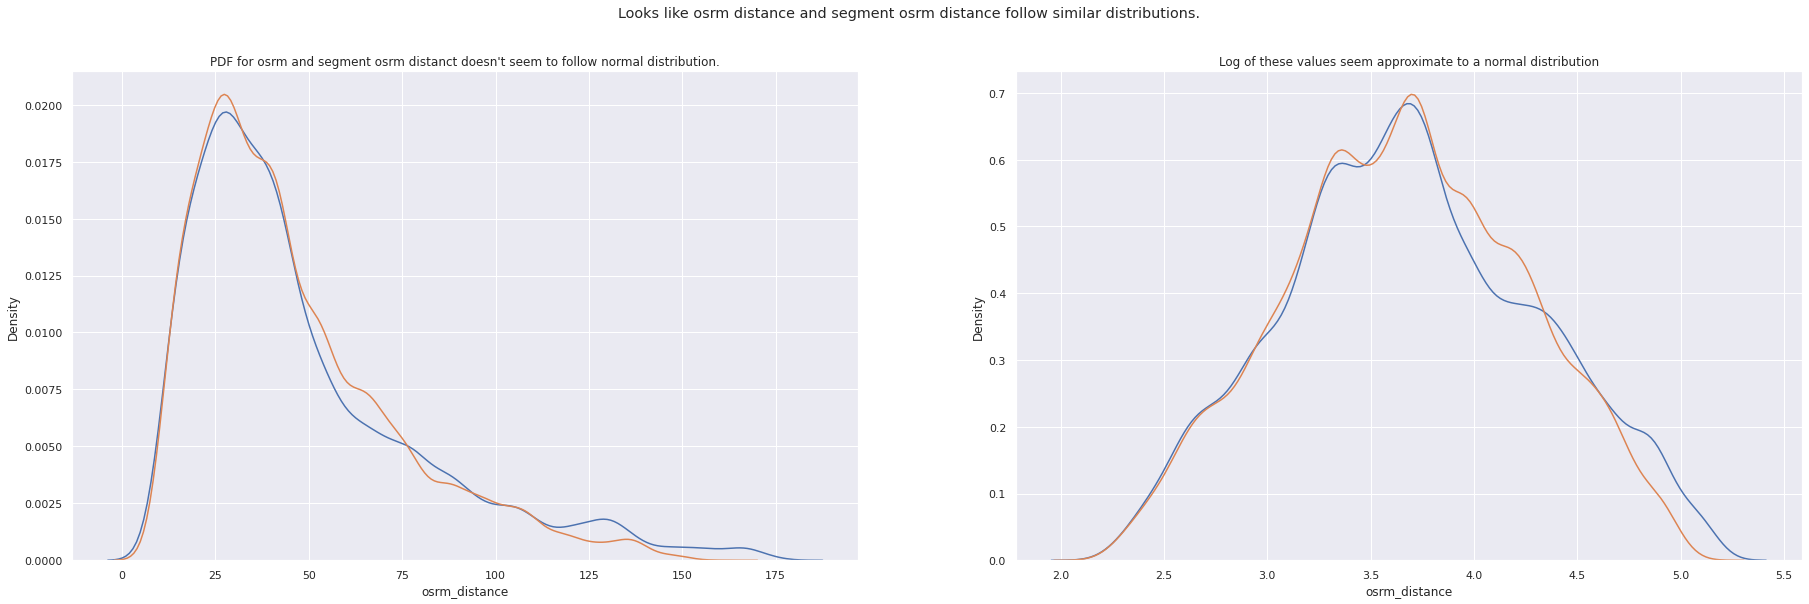

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= False)
sns.kdeplot(x= cleaned.loc[osrm_idx, 'osrm_distance'], ax= ax1)
sns.kdeplot(x= cleaned.loc[segment_osrm_idx, 'segment_osrm_distance'], ax= ax1)
ax1.set_title('PDF for osrm and segment osrm distanct doesn\'t seem to follow normal distribution.')

sns.kdeplot(x= np.log(cleaned.loc[osrm_idx, 'osrm_distance']), ax= ax2)
sns.kdeplot(x= np.log(cleaned.loc[segment_osrm_idx, 'segment_osrm_distance']), ax= ax2)
ax2.set_title('Log of these values seem approximate to a normal distribution')

plt.suptitle('Looks like osrm distance and segment osrm distance follow similar distributions.')

plt.show()

In [ ]:
print('average actual time:', cleaned.loc[osrm_idx, 'osrm_distance'].mean())
print('standard deviation:', cleaned.loc[osrm_idx, 'osrm_distance'].std())
print('average osrm time:', cleaned.loc[segment_osrm_idx, 'segment_osrm_distance'].mean())
print('standard deviation:', cleaned.loc[segment_osrm_idx, 'segment_osrm_distance'].std())

average actual time: 43.536091128397466
standard deviation: 24.123013295033985
average osrm time: 45.40590915407574
standard deviation: 25.67995768485745


In [ ]:
actual_sample_size= cleaned.loc[osrm_idx, 'osrm_distance'].shape[0]
segment_actual_sample_size= cleaned.loc[segment_osrm_idx, 'segment_osrm_distance'].shape[0]
print(actual_sample_size, segment_actual_sample_size)

21597 21444


In [ ]:
# Null hypothesis: osrm distance and segment osrm distance are actually the same.
# Alternate hypothesis: osrm distance and segment osrm distance time are different.

# test-statistic = average time

# H0: avg. osrm distance = avg. segement osrm distance
# H1: avg. osrm distance != avg. segement osrm distance

# two-tailed T-test to check if actual and segment actual time are actually different.

stat, pvalue= ttest_ind(cleaned.loc[osrm_idx, 'osrm_distance'].sample(segment_actual_sample_size), cleaned.loc[segment_osrm_idx, 'segment_osrm_distance'], equal_var= False)

print(stat)
print(pvalue)

if pvalue < 0.05:
  print('we reject the null hypothesis.')
else:
  print('we fail to reject the null hypothesis.')

-7.7498615495659084
9.401910584760783e-15
we reject the null hypothesis.


### Hypothesis testing / visual analysis between osrm time aggregated value and segment osrm time aggregated value
* We saw that visually the two distribution seems to be somewhat different.
* We also reject the null hypothesis because the p value is less than 0.05.

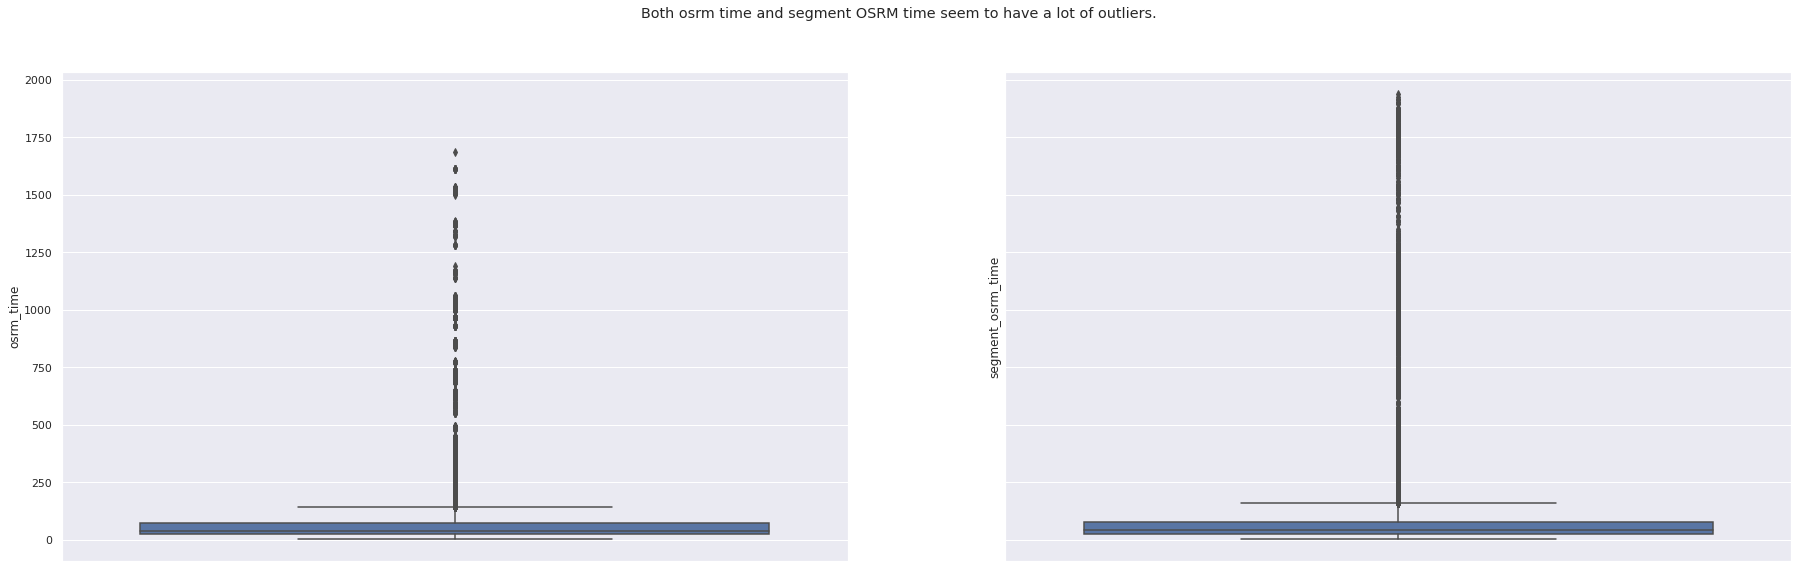

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned['osrm_time'], ax= ax1)
sns.boxplot(y= cleaned['segment_osrm_time'], ax= ax2)
plt.suptitle('Both osrm time and segment OSRM time seem to have a lot of outliers.')

plt.show()

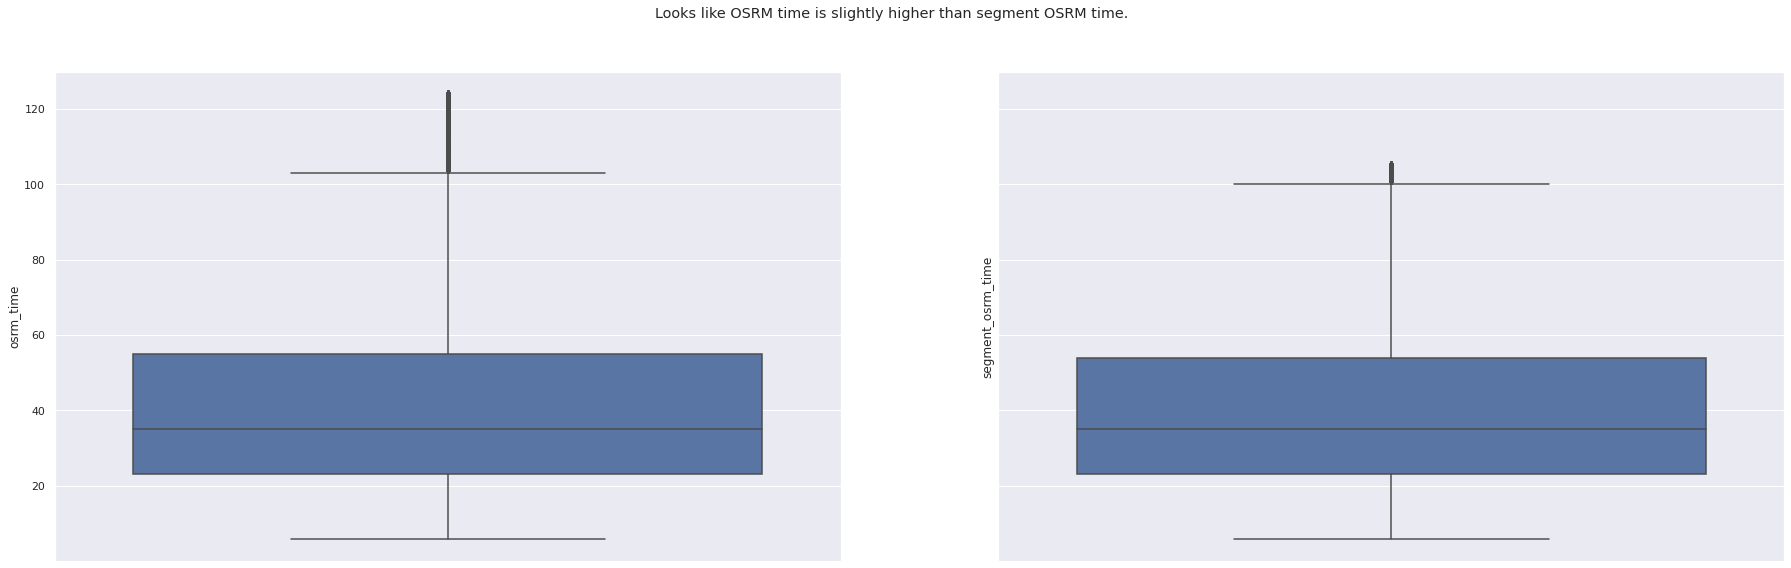

In [ ]:
# Treating outliers in actual time.
q1= cleaned['osrm_time'].quantile(.25)
q3= cleaned['segment_osrm_distance'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

osrm_idx= (cleaned['osrm_time'] > lower) & (cleaned['osrm_time'] < upper)

# Treating outliers in OSRM time.
q1= cleaned['segment_osrm_time'].quantile(.25)
q3= cleaned['segment_osrm_time'].quantile(.75)

iqr= q3 - q1

lower= q1 - 1.5 * iqr
upper= q1 + 1.5 * iqr

segment_osrm_idx= (cleaned['segment_osrm_time'] > lower) & (cleaned['segment_osrm_time'] < upper)

# Plotting the treated fields.

fig, (ax1, ax2)= plt.subplots(1, 2, sharey= True)
sns.boxplot(y= cleaned.loc[osrm_idx, 'osrm_time'], ax= ax1)
sns.boxplot(y= cleaned.loc[segment_osrm_idx, 'segment_osrm_time'], ax= ax2)
plt.suptitle('Looks like OSRM time is slightly higher than segment OSRM time.')

plt.show()

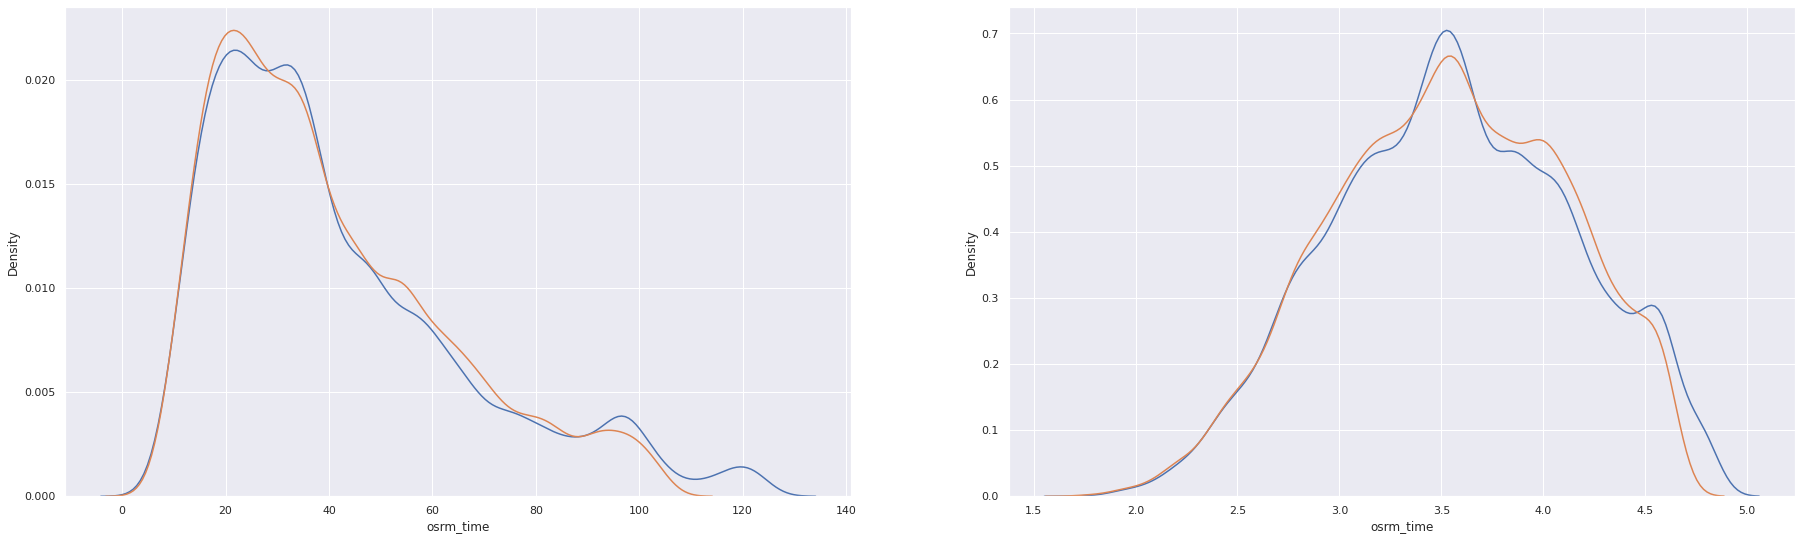

In [ ]:
fig, (ax1, ax2)= plt.subplots(1, 2, sharey= False)
sns.kdeplot(x= cleaned.loc[osrm_idx, 'osrm_time'], ax= ax1)
sns.kdeplot(x= cleaned.loc[segment_osrm_idx, 'segment_osrm_time'], ax= ax1)
# ax1.set_title('PDF for osrm and segment osrm distanct doesn\'t seem to follow normal distribution.')

sns.kdeplot(x= np.log(cleaned.loc[osrm_idx, 'osrm_time']), ax= ax2)
sns.kdeplot(x= np.log(cleaned.loc[segment_osrm_idx, 'segment_osrm_time']), ax= ax2)
ax2.set_title('Log of these values seem approximate to a normal distribution')

plt.suptitle('Looks like osrm time and segment osrm time follow similar distributions.')

plt.show()

In [ ]:
print('average actual time:', cleaned.loc[osrm_idx, 'osrm_time'].mean())
print('standard deviation:', cleaned.loc[osrm_idx, 'osrm_time'].std())
print('average osrm time:', cleaned.loc[segment_osrm_idx, 'segment_osrm_time'].mean())
print('standard deviation:', cleaned.loc[segment_osrm_idx, 'segment_osrm_time'].std())

average actual time: 41.855978975032855
standard deviation: 25.112815198253877
average osrm time: 40.156046208310045
standard deviation: 22.39847489675932


In [ ]:
actual_sample_size= cleaned.loc[osrm_idx, 'osrm_time'].shape[0]
segment_actual_sample_size= cleaned.loc[segment_osrm_idx, 'segment_osrm_time'].shape[0]
print(actual_sample_size, segment_actual_sample_size)

22830 21468


In [ ]:
# Null hypothesis: osrm time and segment osrm time are actually the same.
# Alternate hypothesis: osrm time and segment osrm time are different.

# test-statistic = average time

# H0: avg. osrm time = avg. segement osrm time
# H1: avg. osrm time != avg. segement osrm time

# two-tailed T-test to check if actual and segment actual time are actually different.

stat, pvalue= ttest_ind(cleaned.loc[osrm_idx, 'osrm_time'].sample(segment_actual_sample_size), cleaned.loc[segment_osrm_idx, 'segment_osrm_time'], equal_var= False)

print(stat)
print(pvalue)

if pvalue < 0.05:
  print('we reject the null hypothesis.')
else:
  print('we fail to reject the null hypothesis.')

7.629012511583253
2.414952103970721e-14
we reject the null hypothesis.


# Handling outliers: We have handled most of the outliers in the earlier sectiosn of the notebook while performing hypothesis tests.
# We have also treated the outliers before doing the hypothesis test.

## We will one hot encode the categorical variables like route_type.
## There are no other feature that we can technically call category since they have high cardinality.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
encoder= OneHotEncoder(handle_unknown= 'ignore', drop= 'first', sparse= False)

encoder.fit(cleaned[['route_type']])

one_hot_encoded = encoder.transform(cleaned[['route_type']])

cleaned['route_type'] = pd.DataFrame(one_hot_encoded).astype(int)

## We have selected just the dtype that are floats using the pandas selecte dtypes method


In [ ]:
numeric_columns= cleaned.select_dtypes(include = 'float').columns

Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance',
       'time_between_start_and_end_in_mins', 'start_scan_to_end_scan_treated'],
      dtype='object')

In [ ]:
scaler= StandardScaler()

scaler.fit(cleaned[numeric_columns])

cleaned[numeric_columns] = scaler.transform(cleaned[numeric_columns])
cleaned.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_place,source_state,source_city,source_place,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,time_between_start_and_end_in_mins,start_scan_to_end_scan_treated
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,IND209304AAA,IND000000ACB,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2.183046,...,Bilaspur,Uttar Pradesh,Kanpur,Central,2018,9,12,0,2.182447,1.661867
1,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,1.590603,...,Central,Madhya Pradesh,Bhopal,Trnsport,2018,9,12,0,1.589963,1.661867
2,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,IND561203AAB,IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,-0.545370,...,ShntiSgr,Karnataka,Doddablpur,ChikaDPP,2018,9,12,0,-0.544606,-1.086218
3,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,-0.400097,...,ChikaDPP,Karnataka,Tumkur,Veersagr,2018,9,12,0,-0.399498,-0.593564
4,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,IND000000ACB,IND160002AAC,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,1.216070,...,Mehmdpur,Haryana,Gurgaon,Bilaspur,2018,9,12,0,1.215849,1.661867


## We can see the scaled columns below.

In [ ]:
cleaned[numeric_columns].head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,time_between_start_and_end_in_mins,start_scan_to_end_scan_treated
0,2.183046,1.391206,1.380576,1.287645,1.307181,1.387805,2.004753,1.906768,2.182447,1.661867
1,1.590603,1.664422,1.635224,1.606431,1.694356,1.629100,1.726520,1.834136,1.589963,1.661867
2,-0.545370,-0.323675,-0.399355,-0.349513,-0.341367,-0.400925,-0.350950,-0.340031,-0.544606,-1.086218
3,-0.400097,-0.209551,-0.272031,-0.263062,-0.228224,-0.272409,-0.290667,-0.242837,-0.399498,-0.593564
4,1.216070,0.692487,1.066165,0.655475,0.655649,1.073073,0.599678,0.672609,1.215849,1.661867


# Business Insights

## Clearly from the visualizations we can see that Delhivery consistently goes over the OSRM time predicted by the software.
## The team should look in to understanding whether the software consistently under predict time or if Delhivery has hard time aligning with the time.
## Close to 80% of all deliveries are sent or recieved across just 17% of centeres. Delhivery should concentrate on improving the time for these centeres.
## We can see that most deliveries happen across Maharashtra and Karnataka
## Surprisingly Gurgaon seems to top the chart when it comes to city and Banglore as expected since the Karantaka was also listed in the top state.
## We can also see that Central and Bilsapur was the most common corridors that Delihivery served.

In [ ]:
print(cleaned.groupby('source_state')['trip_uuid'].nunique().sort_values(ascending= False).head(5))
print('_' * 25)
cleaned.groupby('destination_state')['trip_uuid'].nunique().sort_values(ascending= False).head(5)

source_state
Maharashtra      2278
Karnataka        2264
Haryana          1743
Tamil Nadu        959
Uttar Pradesh     850
Name: trip_uuid, dtype: int64
_________________________


destination_state
Karnataka      2304
Maharashtra    2231
Haryana        1660
Tamil Nadu     1027
Telangana       856
Name: trip_uuid, dtype: int64

In [ ]:
print(cleaned.groupby('source_city')['trip_uuid'].nunique().sort_values(ascending= False).head(5))
print('_' * 25)
cleaned.groupby('destination_city')['trip_uuid'].nunique().sort_values(ascending= False).head(5)

source_city
Gurgaon      1131
Bengaluru    1099
Bhiwandi      821
Bangalore     792
Mumbai        643
Name: trip_uuid, dtype: int64
_________________________


destination_city
Bengaluru    1143
Gurgaon       972
Mumbai        966
Bangalore     683
Hyderabad     635
Name: trip_uuid, dtype: int64

In [ ]:
print(cleaned.groupby('source_place')['trip_uuid'].nunique().sort_values(ascending= False).head(5))
print('_' * 25)
cleaned.groupby('destination_place')['trip_uuid'].nunique().sort_values(ascending= False).head(5)

source_place
Central     1696
Bilaspur    1085
Mankoli      821
Nelmngla     769
Bomsndra     468
Name: trip_uuid, dtype: int64
_________________________


destination_place
Central     1575
Bilaspur     971
Nelmngla     665
Mankoli      614
Shamshbd     464
Name: trip_uuid, dtype: int64

# Recommendations

## Delihivery should review the actual time taken and the time recommended by the OSRM system. If the OSRM is consistently under reporting time taken. If these times are used to inform customers of their expected delivery and the deliveries are delayed this could lead to bad customer expereince.

## It is also clear that segement time and the actual time are not equal This could indicate possible data issues with Delhiveries system. Delhivery team should review this.

## Since there is clear evidence that 80% of deliveries are done across just 20% of centeres. Delihivery should work on optimizing the processes across these centers. This could potentially bring great improvements across the whole business as this improve experience for a great proportion of customers.

# THE END